In [1]:
# import packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score,log_loss

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier



Bad key text.latex.preview in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

# Processing the data

In [2]:
# creating back up file 

fraud_data_backup = pd.read_csv('/Users/vladimirant/Desktop/Fall2022/ML Class Fall2022/HW1/fraud_oracle.csv')

In [3]:
# creating working data file


fraud_data=fraud_data_backup.copy()

In [4]:
fraud_data.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [5]:
fraud_data.tail()

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
15415          Nov                   5    Male       Married  ...   
15416          Dec                   1    Male       Married  ...   
15417          Dec                   1    Male        Single  ...   
15418          Dec                   2  Female       Married  ...   
15419          Dec                   3    Male        Single  ...   

       AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent  \
15415       6 years          31 to 35                No             No   
15416       6 years          31 to 35                No             No   
15417       5 years          26 to 30                No             No   
15418       2 years          31 to 35                No             No   
15419       5 years          26 to 30                No             No   

      AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
15415  External                 none            no change     1 vehicle  1996   
15416  External          more than 5            no change        3 to 4  1996   
15417  External               1 to 2            no change     1 vehicle  1996   
15418  External          more than 5            no change     1 vehicle  1996   
15419  External               1 to 2            no change     1 vehicle  1996   

       BasePolicy  
15415   Collision  
15416   Liability  
15417   Collision  
15418  All Perils  
15419   Collision  

[5 rows x 33 columns]

In [6]:
#getting information about data types of the variables


fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [7]:
#looks like too much categorical variables
#also some numerical values look more a categorical one, like policy number

In [8]:
#Checking for missing values
##############################pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.
fraud_data.isnull().sum()

#NO missinng values

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [9]:
#Basic stats of the dataset
fraud_data.describe()

WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000      1.000000   1994.000000  
25%     3855.750000      5.000000    400.000000      1.000000   1994.000000  
50%     7710.500000      8.000000    400.000000      2.000000   1995.000000  
75%    11565.250000     12.000000    400.000000      3.000000   1996.000000  
max    15420.000000     16.000000    700.000000      4.000000   1996.000000

In [10]:
fraud_data['PolicyNumber'].unique()

array([    1,     2,     3, ..., 15418, 15419, 15420])

In [11]:
#So looks like policy number is the same as an order number in the table...
fraud_data=fraud_data.drop('PolicyNumber', axis=1)

In [12]:
fraud_data['RepNumber'].unique()

array([12, 15,  7,  4,  3, 14,  1, 13, 11, 16,  6,  2,  8,  5,  9, 10])

In [13]:
fraud_data['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [14]:
fraud_data['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [15]:
fraud_data['VehicleCategory'].unique()

array(['Sport', 'Utility', 'Sedan'], dtype=object)

In [16]:
fraud_data['Days_Policy_Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [17]:
fraud_data['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [18]:
fraud_data['AgentType'].unique()

array(['External', 'Internal'], dtype=object)

In [19]:
#first of all I am droping the variables from the table that I think are irrelevant...
#00) Month: Month in which the accident occurred
#01) WeekOfMonth: Week in the month of accident
#02) DayOfWeek: Day of the week of the accident
#05) DayOfWeekClaimed: Day of the week the accident was claimed
#06) MonthClaimed: Month the accident was claimed
#07) WeekOfMonthClaimed: Week in the month of accident

#also, we have variables that should contain information about this time variables

#20) Days_Policy_Accident: Days between insurance is acquired and the accident occurred
#21) Days_Policy_Claim: Days between insurance is acquired and the accident was claimed

#In addition i will exclude year variables later on

#However, for the lasso regression I will include all these variables to see how it can
#handle it, since its suppose to shrink some coefficients to 0

# In addition, all the mentioned variables seems 
#to have a weak correlation with target variable

In [20]:
months=pd.get_dummies(fraud_data[['Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed', 'MonthClaimed',
'WeekOfMonthClaimed']])
years=pd.get_dummies(fraud_data['Year'])

In [21]:
months['y']=fraud_data['FraudFound_P']
months.corr()
#Indeed no any significant correlations

WeekOfMonth  WeekOfMonthClaimed  Month_Apr  \
WeekOfMonth                    1.000000            0.275400  -0.012851   
WeekOfMonthClaimed             0.275400            1.000000  -0.036457   
Month_Apr                     -0.012851           -0.036457   1.000000   
Month_Aug                      0.013210            0.029861  -0.084485   
Month_Dec                      0.024177            0.003587  -0.090716   
Month_Feb                     -0.045750           -0.035755  -0.089982   
Month_Jan                      0.003722           -0.007358  -0.095486   
Month_Jul                     -0.003912           -0.033754  -0.089633   
Month_Jun                      0.002030           -0.001975  -0.092095   
Month_Mar                      0.003290           -0.009226  -0.093574   
Month_May                      0.000178            0.011297  -0.093838   
Month_Nov                     -0.003776            0.050652  -0.087441   
Month_Oct                      0.010477            0.021350  -0.091484   
Month_Sep                      0.009289            0.010698  -0.088972   
DayOfWeek_Friday               0.014742            0.009059  -0.011556   
DayOfWeek_Monday               0.007523            0.002687  -0.020136   
DayOfWeek_Saturday            -0.004361            0.008396   0.040367   
DayOfWeek_Sunday              -0.023703            0.001305   0.011982   
DayOfWeek_Thursday             0.008310           -0.013618  -0.005660   
DayOfWeek_Tuesday              0.000177            0.001716  -0.009845   
DayOfWeek_Wednesday           -0.006322           -0.009838  -0.000147   
DayOfWeekClaimed_0            -0.004932           -0.010835  -0.002423   
DayOfWeekClaimed_Friday       -0.003158           -0.012561  -0.025059   
DayOfWeekClaimed_Monday       -0.014868            0.008970  -0.010330   
DayOfWeekClaimed_Saturday      0.003260           -0.039400  -0.009212   
DayOfWeekClaimed_Sunday        0.014764           -0.033838   0.002771   
DayOfWeekClaimed_Thursday      0.000581           -0.009128   0.000122   
DayOfWeekClaimed_Tuesday       0.001282            0.011567   0.020377   
DayOfWeekClaimed_Wednesday     0.014453            0.012844   0.014962   
MonthClaimed_0                -0.004932           -0.010835  -0.002423   
MonthClaimed_Apr              -0.005548           -0.039524   0.697867   
MonthClaimed_Aug               0.023241            0.017143  -0.082638   
MonthClaimed_Dec              -0.016269            0.032934  -0.082563   
MonthClaimed_Feb              -0.021108           -0.041554  -0.089943   
MonthClaimed_Jan               0.014290            0.002919  -0.095171   
MonthClaimed_Jul               0.000928           -0.032210  -0.079693   
MonthClaimed_Jun              -0.010657            0.007563  -0.070670   
MonthClaimed_Mar              -0.028000           -0.006651  -0.093121   
MonthClaimed_May               0.013679           -0.002178   0.152348   
MonthClaimed_Nov               0.017981            0.043468  -0.088165   
MonthClaimed_Oct               0.005560            0.000874  -0.088606   
MonthClaimed_Sep               0.005844            0.019701  -0.085595   
y                             -0.011861           -0.005761   0.003352   

                            Month_Aug  Month_Dec  Month_Feb  Month_Jan  \
WeekOfMonth                  0.013210   0.024177  -0.045750   0.003722   
WeekOfMonthClaimed           0.029861   0.003587  -0.035755  -0.007358   
Month_Apr                   -0.084485  -0.090716  -0.089982  -0.095486   
Month_Aug                    1.000000  -0.084665  -0.083980  -0.089117   
Month_Dec                   -0.084665   1.000000  -0.090174  -0.095689   
Month_Feb                   -0.083980  -0.090174   1.000000  -0.094916   
Month_Jan                   -0.089117  -0.095689  -0.094916   1.000000   
Month_Jul                   -0.083655  -0.089824  -0.089098  -0.094547   
Month_Jun                   -0.085952  -0.092291  -0.091545  -0.097144   
Month_Mar                   -0.

In [22]:
fraud_data=fraud_data.drop(['Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed', 'MonthClaimed',
'WeekOfMonthClaimed'], axis=1)

In [23]:
fraud_data

Make AccidentArea     Sex MaritalStatus  Age          Fault  \
0        Honda        Urban  Female        Single   21  Policy Holder   
1        Honda        Urban    Male        Single   34  Policy Holder   
2        Honda        Urban    Male       Married   47  Policy Holder   
3       Toyota        Rural    Male       Married   65    Third Party   
4        Honda        Urban  Female        Single   27    Third Party   
...        ...          ...     ...           ...  ...            ...   
15415   Toyota        Urban    Male       Married   35  Policy Holder   
15416  Pontiac        Urban    Male       Married   30  Policy Holder   
15417   Toyota        Rural    Male        Single   24  Policy Holder   
15418   Toyota        Urban  Female       Married   34    Third Party   
15419   Toyota        Urban    Male        Single   21  Policy Holder   

               PolicyType VehicleCategory     VehiclePrice  FraudFound_P  ...  \
0       Sport - Liability           Sport  more than 69000             0  ...   
1       Sport - Collision           Sport  more than 69000             0  ...   
2       Sport - Collision           Sport  more than 69000             0  ...   
3       Sedan - Liability           Sport   20000 to 29000             0  ...   
4       Sport - Collision           Sport  more than 69000             0  ...   
...                   ...             ...              ...           ...  ...   
15415   Sedan - Collision           Sedan   20000 to 29000             1  ...   
15416   Sedan - Liability           Sport   30000 to 39000             0  ...   
15417   Sedan - Collision           Sedan   20000 to 29000             1  ...   
15418  Sedan - All Perils           Sedan   20000 to 29000             0  ...   
15419   Sedan - Collision           Sedan   20000 to 29000             1  ...   

       AgeOfVehicle  AgeOfPolicyHolder  PoliceReportFiled WitnessPresent  \
0           3 years           26 to 30                 No             No   
1           6 years           31 to 35                Yes             No   
2           7 years           41 to 50                 No             No   
3       more than 7           51 to 65                Yes             No   
4           5 years           31 to 35                 No             No   
...             ...                ...                ...            ...   
15415       6 years           31 to 35                 No             No   
15416       6 years           31 to 35                 No             No   
15417       5 years           26 to 30                 No             No   
15418       2 years           31 to 35                 No             No   
15419       5 years           26 to 30                 No             No   

      AgentType NumberOfSuppliments AddressChange_Claim NumberOfCars  Year  \
0      External                none              1 year       3 to 4  1994   
1      External                none           no change    1 vehicle  1994   
2      External                none           no change    1 vehicle  1994   
3      External         more than 5           no change    1 vehicle  1994   
4      External                none           no change    1 vehicle  1994   
...         ...                 ...                 ...          ...   ...   
15415  External                none           no change    1 vehicle  1996   
15416  External         more than 5           no change       3 to 4  1996   
15417  External              1 to 2           no change    1 vehicle  1996   
15418  External         more than 5           no change    1 vehicle  1996   
15419  External              1 to 2           no change    1 vehicle  1996   

       BasePolicy  
0       Liability  
1       Collision  
2       Collision  
3       Liability  
4       Collision  
...           ...  
15415   Collision  
15416   Liability  
15417   Collision  
15418  All Perils  
15419   Collision  

[15420 rows x 26 columns]

In [24]:
#Transforming variables to dummies

In [25]:
# Getting the list of variables that have exacttly 2 uniques variables 
#to translate them to 0,1 binary variables
# i.e vor variable 'sex' i will create variable sex_Male, where value 1 
#means person is male
#and variable 0 means person is female

names=fraud_data.columns
names=list(names)
names

for i in names:
    if len(fraud_data[i].unique())==2:
        print (i, fraud_data[i].unique())

AccidentArea ['Urban' 'Rural']
Sex ['Female' 'Male']
Fault ['Policy Holder' 'Third Party']
FraudFound_P [0 1]
PoliceReportFiled ['No' 'Yes']
WitnessPresent ['No' 'Yes']
AgentType ['External' 'Internal']


In [26]:
fraud_data.loc[fraud_data['Fault']=="Policy Holder", 'Policy Holder Fault_3rdParty'] = 1
fraud_data.loc[fraud_data['Fault']=="Third Party", 'Policy Holder Fault_3rdParty'] = 0
fraud_data['Policy Holder Fault_3rdParty']

0        1.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
15415    1.0
15416    1.0
15417    1.0
15418    0.0
15419    1.0
Name: Policy Holder Fault_3rdParty, Length: 15420, dtype: float64

In [27]:
fraud_data.loc[fraud_data['Sex']=='Male','Male_Fem'] = 1
fraud_data.loc[fraud_data['Sex']=="Female", 'Male_Fem'] = 0
fraud_data['Male_Fem']

0        0.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
15415    1.0
15416    1.0
15417    1.0
15418    0.0
15419    1.0
Name: Male_Fem, Length: 15420, dtype: float64

In [28]:
fraud_data.loc[fraud_data['PoliceReportFiled']=='Yes','PoliceReportFiled'] = 1
fraud_data.loc[fraud_data['PoliceReportFiled']=="No", 'PoliceReportFiled'] = 0
fraud_data['PoliceReportFiled']

0        0
1        1
2        0
3        1
4        0
        ..
15415    0
15416    0
15417    0
15418    0
15419    0
Name: PoliceReportFiled, Length: 15420, dtype: object

In [29]:
fraud_data.loc[fraud_data['AccidentArea']=='Urban','UrbanAccArea_Rural'] = 1
fraud_data.loc[fraud_data['AccidentArea']=="Rural", 'UrbanAccArea_Rural'] = 0
fraud_data['UrbanAccArea_Rural']

0        1.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
15415    1.0
15416    1.0
15417    0.0
15418    1.0
15419    1.0
Name: UrbanAccArea_Rural, Length: 15420, dtype: float64

In [30]:
fraud_data.loc[fraud_data['WitnessPresent']=='Yes','WitnessPresent'] = 1
fraud_data.loc[fraud_data['WitnessPresent']=="No", 'WitnessPresent'] = 0
fraud_data['WitnessPresent']

0        0
1        0
2        0
3        0
4        0
        ..
15415    0
15416    0
15417    0
15418    0
15419    0
Name: WitnessPresent, Length: 15420, dtype: object

In [31]:
fraud_data.loc[fraud_data['AgentType']=='External','ExternalAgent_Internal'] = 1
fraud_data.loc[fraud_data['AgentType']=="Internal", 'ExternalAgent_Internal'] = 0
fraud_data['ExternalAgent_Internal']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
15415    1.0
15416    1.0
15417    1.0
15418    1.0
15419    1.0
Name: ExternalAgent_Internal, Length: 15420, dtype: float64

In [32]:
fraud_data=fraud_data.drop(['AccidentArea','Fault','Sex','PoliceReportFiled','WitnessPresent','AgentType'],axis=1)

In [33]:
#Now lets translate other variables to dummies too

In [34]:
fraud_data['AddressChange_Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [35]:
fraud_data['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [36]:
names_to_dummies=['MaritalStatus','VehicleCategory','Make','BasePolicy']

In [37]:
s1=pd.get_dummies(fraud_data[names_to_dummies])

In [38]:
fraud_data = pd.concat([fraud_data, s1], axis=1)

In [39]:
fraud_data

Make MaritalStatus  Age          PolicyType VehicleCategory  \
0        Honda        Single   21   Sport - Liability           Sport   
1        Honda        Single   34   Sport - Collision           Sport   
2        Honda       Married   47   Sport - Collision           Sport   
3       Toyota       Married   65   Sedan - Liability           Sport   
4        Honda        Single   27   Sport - Collision           Sport   
...        ...           ...  ...                 ...             ...   
15415   Toyota       Married   35   Sedan - Collision           Sedan   
15416  Pontiac       Married   30   Sedan - Liability           Sport   
15417   Toyota        Single   24   Sedan - Collision           Sedan   
15418   Toyota       Married   34  Sedan - All Perils           Sedan   
15419   Toyota        Single   21   Sedan - Collision           Sedan   

          VehiclePrice  FraudFound_P  RepNumber  Deductible  DriverRating  \
0      more than 69000             0         12         300             1   
1      more than 69000             0         15         400             4   
2      more than 69000             0          7         400             3   
3       20000 to 29000             0          4         400             2   
4      more than 69000             0          3         400             1   
...                ...           ...        ...         ...           ...   
15415   20000 to 29000             1          5         400             4   
15416   30000 to 39000             0         11         400             3   
15417   20000 to 29000             1          4         400             4   
15418   20000 to 29000             0          6         400             4   
15419   20000 to 29000             1          3         400             4   

       ... Make_Nisson Make_Pontiac Make_Porche Make_Saab Make_Saturn  \
0      ...           0            0           0         0           0   
1      ...           0            0           0         0           0   
2      ...           0            0           0         0           0   
3      ...           0            0           0         0           0   
4      ...           0            0           0         0           0   
...    ...         ...          ...         ...       ...         ...   
15415  ...           0            0           0         0           0   
15416  ...           0            1           0         0           0   
15417  ...           0            0           0         0           0   
15418  ...           0            0           0         0           0   
15419  ...           0            0           0         0           0   

      Make_Toyota Make_VW BasePolicy_All Perils  BasePolicy_Collision  \
0               0       0                     0                     0   
1               0       0                     0                     1   
2               0       0                     0                     1   
3               1       0                     0                     0   
4               0       0                     0                     1   
...           ...     ...                   ...                   ...   
15415           1       0                     0                     1   
15416           0       0                     0                     0   
15417           1       0                     0                     1   
15418           1       0                     1                     0   
15419           1       0                     0                     1   

      BasePolicy_Liability  
0                        1  
1                        0  
2                        0  
3                        1  
4                        0  
...                    ...  
15415                    0  
15416                    1  
15417                    0  
15418                    0  
15419                    0  

[15420 rows x 53 columns]

In [40]:
fraud_data=fraud_data.drop(names_to_dummies,axis=1)

In [41]:
fraud_data=fraud_data.drop(['PolicyType'],axis=1)

In [42]:
fraud_data

Age     VehiclePrice  FraudFound_P  RepNumber  Deductible  \
0       21  more than 69000             0         12         300   
1       34  more than 69000             0         15         400   
2       47  more than 69000             0          7         400   
3       65   20000 to 29000             0          4         400   
4       27  more than 69000             0          3         400   
...    ...              ...           ...        ...         ...   
15415   35   20000 to 29000             1          5         400   
15416   30   30000 to 39000             0         11         400   
15417   24   20000 to 29000             1          4         400   
15418   34   20000 to 29000             0          6         400   
15419   21   20000 to 29000             1          3         400   

       DriverRating Days_Policy_Accident Days_Policy_Claim PastNumberOfClaims  \
0                 1         more than 30      more than 30               none   
1                 4         more than 30      more than 30               none   
2                 3         more than 30      more than 30                  1   
3                 2         more than 30      more than 30                  1   
4                 1         more than 30      more than 30               none   
...             ...                  ...               ...                ...   
15415             4         more than 30      more than 30             2 to 4   
15416             3         more than 30      more than 30        more than 4   
15417             4         more than 30      more than 30        more than 4   
15418             4         more than 30      more than 30               none   
15419             4         more than 30      more than 30               none   

      AgeOfVehicle  ... Make_Nisson Make_Pontiac Make_Porche Make_Saab  \
0          3 years  ...           0            0           0         0   
1          6 years  ...           0            0           0         0   
2          7 years  ...           0            0           0         0   
3      more than 7  ...           0            0           0         0   
4          5 years  ...           0            0           0         0   
...            ...  ...         ...          ...         ...       ...   
15415      6 years  ...           0            0           0         0   
15416      6 years  ...           0            1           0         0   
15417      5 years  ...           0            0           0         0   
15418      2 years  ...           0            0           0         0   
15419      5 years  ...           0            0           0         0   

       Make_Saturn  Make_Toyota  Make_VW  BasePolicy_All Perils  \
0                0            0        0                      0   
1                0            0        0                      0   
2                0            0        0                      0   
3                0            1        0                      0   
4                0            0        0                      0   
...            ...          ...      ...                    ...   
15415            0            1        0                      0   
15416            0            0        0                      0   
15417            0            1        0                      0   
15418            0            1        0                      1   
15419            0            1        0                      0   

       BasePolicy_Collision  BasePolicy_Liability  
0                         0                     1  
1                         1                     0  
2                         1                     0  
3                         0                     1  
4                         1                     0  
...                     ...                   ...  
15415                     1                     0  
15416                     0                     1  
15417                     1                     0  
154

In [43]:
#now lets convert some variables to numeric

In [44]:
fraud_data['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [45]:
fraud_data.loc[fraud_data['VehiclePrice']=='less than 20000','VehiclePrice'] = 10000
fraud_data.loc[fraud_data['VehiclePrice']=='20000 to 29000','VehiclePrice'] = 25000
fraud_data.loc[fraud_data['VehiclePrice']=='30000 to 39000','VehiclePrice'] = 35000
fraud_data.loc[fraud_data['VehiclePrice']=='40000 to 59000','VehiclePrice'] = 50000
fraud_data.loc[fraud_data['VehiclePrice']=='50000 to 59000','VehiclePrice'] = 55000
fraud_data.loc[fraud_data['VehiclePrice']=='60000 to 69000','VehiclePrice'] = 65000
fraud_data.loc[fraud_data['VehiclePrice']=='more than 69000','VehiclePrice'] = 75000
fraud_data['VehiclePrice']=pd.to_numeric(fraud_data['VehiclePrice'])
fraud_data['VehiclePrice']

0        75000
1        75000
2        75000
3        25000
4        75000
         ...  
15415    25000
15416    35000
15417    25000
15418    25000
15419    25000
Name: VehiclePrice, Length: 15420, dtype: int64

In [46]:
fraud_data['Days_Policy_Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [47]:
fraud_data.loc[fraud_data['Days_Policy_Accident']=='none','Days_Policy_Accident'] = 0
fraud_data.loc[fraud_data['Days_Policy_Accident']=='1 to 7','Days_Policy_Accident'] = 4
fraud_data.loc[fraud_data['Days_Policy_Accident']=='8 to 15','Days_Policy_Accident'] = 11.5
fraud_data.loc[fraud_data['Days_Policy_Accident']=='15 to 30','Days_Policy_Accident'] = 22.5
fraud_data.loc[fraud_data['Days_Policy_Accident']=='more than 30','Days_Policy_Accident'] = 40
fraud_data['Days_Policy_Accident']=pd.to_numeric(fraud_data['Days_Policy_Accident'])
fraud_data['Days_Policy_Accident']

0        40.0
1        40.0
2        40.0
3        40.0
4        40.0
         ... 
15415    40.0
15416    40.0
15417    40.0
15418    40.0
15419    40.0
Name: Days_Policy_Accident, Length: 15420, dtype: float64

In [48]:
fraud_data['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [49]:
fraud_data.loc[fraud_data['Days_Policy_Claim']=='none','Days_Policy_Claim'] = 0
fraud_data.loc[fraud_data['Days_Policy_Claim']=='1 to 7','Days_Policy_Claim'] = 4
fraud_data.loc[fraud_data['Days_Policy_Claim']=='8 to 15','Days_Policy_Claim'] = 11.5
fraud_data.loc[fraud_data['Days_Policy_Claim']=='15 to 30','Days_Policy_Claim'] = 22.5
fraud_data.loc[fraud_data['Days_Policy_Claim']=='more than 30','Days_Policy_Claim'] = 40
fraud_data['Days_Policy_Claim']=pd.to_numeric(fraud_data['Days_Policy_Claim'])
fraud_data['Days_Policy_Claim']


0        40.0
1        40.0
2        40.0
3        40.0
4        40.0
         ... 
15415    40.0
15416    40.0
15417    40.0
15418    40.0
15419    40.0
Name: Days_Policy_Claim, Length: 15420, dtype: float64

In [50]:
fraud_data['PastNumberOfClaims'].unique()

array(['none', '1', '2 to 4', 'more than 4'], dtype=object)

In [51]:
fraud_data.loc[fraud_data['PastNumberOfClaims']=='none','PastNumberOfClaims'] = 0
fraud_data.loc[fraud_data['PastNumberOfClaims']=='1 ','PastNumberOfClaims'] = 1
fraud_data.loc[fraud_data['PastNumberOfClaims']=='2 to 4','PastNumberOfClaims'] = 3
fraud_data.loc[fraud_data['PastNumberOfClaims']=='more than 4','PastNumberOfClaims'] = 5.5
fraud_data['PastNumberOfClaims']=pd.to_numeric(fraud_data['PastNumberOfClaims'])
fraud_data['PastNumberOfClaims']


0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
15415    3.0
15416    5.5
15417    5.5
15418    0.0
15419    0.0
Name: PastNumberOfClaims, Length: 15420, dtype: float64

In [52]:
fraud_data['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [53]:
fraud_data.loc[fraud_data['AgeOfVehicle']=='new','AgeOfVehicle'] = 1
fraud_data.loc[fraud_data['AgeOfVehicle']=='2 years','AgeOfVehicle'] = 2
fraud_data.loc[fraud_data['AgeOfVehicle']=='3 years','AgeOfVehicle'] = 3
fraud_data.loc[fraud_data['AgeOfVehicle']=='4 years','AgeOfVehicle'] = 4
fraud_data.loc[fraud_data['AgeOfVehicle']=='5 years','AgeOfVehicle'] = 5
fraud_data.loc[fraud_data['AgeOfVehicle']=='6 years','AgeOfVehicle'] = 6
fraud_data.loc[fraud_data['AgeOfVehicle']=='7 years','AgeOfVehicle'] = 7
fraud_data.loc[fraud_data['AgeOfVehicle']=="more than 7",'AgeOfVehicle'] = 9
fraud_data['AgeOfVehicle']=pd.to_numeric(fraud_data['AgeOfVehicle'])
fraud_data['AgeOfVehicle']


0        3
1        6
2        7
3        9
4        5
        ..
15415    6
15416    6
15417    5
15418    2
15419    5
Name: AgeOfVehicle, Length: 15420, dtype: int64

In [54]:
fraud_data

Age  VehiclePrice  FraudFound_P  RepNumber  Deductible  DriverRating  \
0       21         75000             0         12         300             1   
1       34         75000             0         15         400             4   
2       47         75000             0          7         400             3   
3       65         25000             0          4         400             2   
4       27         75000             0          3         400             1   
...    ...           ...           ...        ...         ...           ...   
15415   35         25000             1          5         400             4   
15416   30         35000             0         11         400             3   
15417   24         25000             1          4         400             4   
15418   34         25000             0          6         400             4   
15419   21         25000             1          3         400             4   

       Days_Policy_Accident  Days_Policy_Claim  PastNumberOfClaims  \
0                      40.0               40.0                 0.0   
1                      40.0               40.0                 0.0   
2                      40.0               40.0                 1.0   
3                      40.0               40.0                 1.0   
4                      40.0               40.0                 0.0   
...                     ...                ...                 ...   
15415                  40.0               40.0                 3.0   
15416                  40.0               40.0                 5.5   
15417                  40.0               40.0                 5.5   
15418                  40.0               40.0                 0.0   
15419                  40.0               40.0                 0.0   

       AgeOfVehicle  ... Make_Nisson Make_Pontiac Make_Porche Make_Saab  \
0                 3  ...           0            0           0         0   
1                 6  ...           0            0           0         0   
2                 7  ...           0            0           0         0   
3                 9  ...           0            0           0         0   
4                 5  ...           0            0           0         0   
...             ...  ...         ...          ...         ...       ...   
15415             6  ...           0            0           0         0   
15416             6  ...           0            1           0         0   
15417             5  ...           0            0           0         0   
15418             2  ...           0            0           0         0   
15419             5  ...           0            0           0         0   

       Make_Saturn  Make_Toyota  Make_VW  BasePolicy_All Perils  \
0                0            0        0                      0   
1                0            0        0                      0   
2                0            0        0                      0   
3                0            1        0                      0   
4                0            0        0                      0   
...            ...          ...      ...                    ...   
15415            0            1        0                      0   
15416            0            0        0                      0   
15417            0            1        0                      0   
15418            0            1        0                      1   
15419            0            1        0                      0   

       BasePolicy_Collision  BasePolicy_Liability  
0                         0                     1  
1                         1                     0  
2                         1                     0  
3                         0                     1  
4                         1                     0  
...                     ...                   ...  
15415                     1                     0  
15416                     0                     1  
15417                     1                

In [55]:
fraud_data['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [56]:
fraud_data.loc[fraud_data['AgeOfPolicyHolder']=='16 to 17','AgeOfPolicyHolder'] = 16.5
fraud_data.loc[fraud_data['AgeOfPolicyHolder']=='18 to 20','AgeOfPolicyHolder'] = 19
fraud_data.loc[fraud_data['AgeOfPolicyHolder']=='21 to 25','AgeOfPolicyHolder'] = 23
fraud_data.loc[fraud_data['AgeOfPolicyHolder']=='26 to 30','AgeOfPolicyHolder'] = 28
fraud_data.loc[fraud_data['AgeOfPolicyHolder']=='31 to 35','AgeOfPolicyHolder'] = 33
fraud_data.loc[fraud_data['AgeOfPolicyHolder']=='36 to 40','AgeOfPolicyHolder'] = 38
fraud_data.loc[fraud_data['AgeOfPolicyHolder']=='41 to 50','AgeOfPolicyHolder'] = 44.5
fraud_data.loc[fraud_data['AgeOfPolicyHolder']=='51 to 65','AgeOfPolicyHolder'] = 58
fraud_data.loc[fraud_data['AgeOfPolicyHolder']=='over 65','AgeOfPolicyHolder'] = 70
fraud_data['AgeOfPolicyHolder']=pd.to_numeric(fraud_data['AgeOfPolicyHolder'])
fraud_data['AgeOfPolicyHolder']


0        28.0
1        33.0
2        44.5
3        58.0
4        33.0
         ... 
15415    33.0
15416    33.0
15417    28.0
15418    33.0
15419    28.0
Name: AgeOfPolicyHolder, Length: 15420, dtype: float64

In [57]:
fraud_data['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [58]:
fraud_data.loc[fraud_data['NumberOfSuppliments']=='none','NumberOfSuppliments'] = 0
fraud_data.loc[fraud_data['NumberOfSuppliments']=='1 to 2','NumberOfSuppliments'] = 1.5
fraud_data.loc[fraud_data['NumberOfSuppliments']=='3 to 5','NumberOfSuppliments'] = 4
fraud_data.loc[fraud_data['NumberOfSuppliments']=='more than 5','NumberOfSuppliments'] = 6.5
fraud_data['NumberOfSuppliments']=pd.to_numeric(fraud_data['NumberOfSuppliments'])
fraud_data['NumberOfSuppliments']


0        0.0
1        0.0
2        0.0
3        6.5
4        0.0
        ... 
15415    0.0
15416    6.5
15417    1.5
15418    6.5
15419    1.5
Name: NumberOfSuppliments, Length: 15420, dtype: float64

In [59]:
fraud_data['AddressChange_Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [60]:
fraud_data.loc[fraud_data['AddressChange_Claim']=='no change','AddressChange_Claim'] = 0
fraud_data.loc[fraud_data['AddressChange_Claim']=='1 year','AddressChange_Claim'] = 1
fraud_data.loc[fraud_data['AddressChange_Claim']=='under 6 months','AddressChange_Claim'] = 0.5
fraud_data.loc[fraud_data['AddressChange_Claim']=='2 to 3 years','AddressChange_Claim'] = 2.5
fraud_data.loc[fraud_data['AddressChange_Claim']=='4 to 8 years','AddressChange_Claim'] = 6
fraud_data['AddressChange_Claim']=pd.to_numeric(fraud_data['AddressChange_Claim'])
fraud_data['AddressChange_Claim']


0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15415    0.0
15416    0.0
15417    0.0
15418    0.0
15419    0.0
Name: AddressChange_Claim, Length: 15420, dtype: float64

In [61]:
fraud_data['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [62]:
fraud_data.loc[fraud_data['NumberOfCars']=='1 vehicle','NumberOfCars'] = 1
fraud_data.loc[fraud_data['NumberOfCars']=='2 vehicles','NumberOfCars'] = 2
fraud_data.loc[fraud_data['NumberOfCars']=='3 to 4','NumberOfCars'] = 3.5
fraud_data.loc[fraud_data['NumberOfCars']=='5 to 8','NumberOfCars'] = 6.5
fraud_data.loc[fraud_data['NumberOfCars']=='more than 8','NumberOfCars'] = 9
fraud_data['NumberOfCars']=pd.to_numeric(fraud_data['NumberOfCars'])
fraud_data['NumberOfCars']



0        3.5
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
15415    1.0
15416    3.5
15417    1.0
15418    1.0
15419    1.0
Name: NumberOfCars, Length: 15420, dtype: float64

# Creating y and X variables, train-test split, data scaling...

In [63]:
y=fraud_data['FraudFound_P']
X=fraud_data.drop(['FraudFound_P'],axis=1)


In [64]:
#Sacaling the data
X=(X-X.min())/(X.max()-X.min())

<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

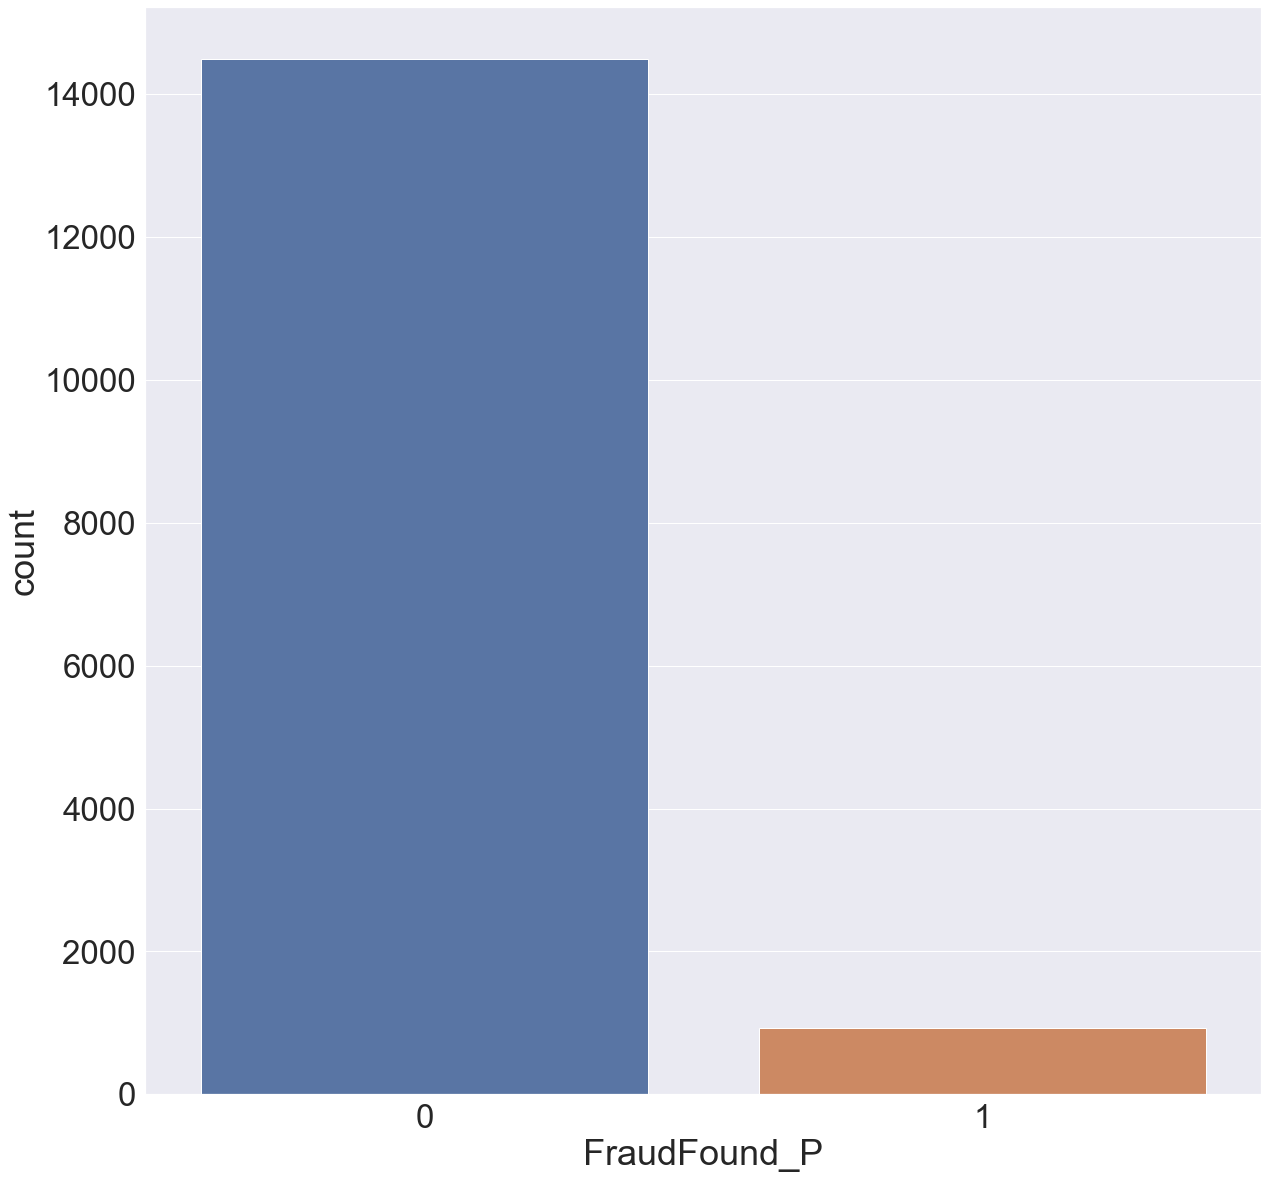

In [66]:
#distribution of the target class in the dataset

sns.set(font_scale=3)

plt.subplots(figsize=(20,20))
sns.countplot(x=y)

In [65]:
#Train set target variable distribution

total_def_loan=sum(y)
freq_default=total_def_loan/len(y)
freq_non_def=1-freq_default

print("defaults,%    ", freq_default*100)
print("non_defaults,%   ", freq_non_def*100)

defaults,%     5.985732814526589
non_defaults,%    94.01426718547341


In [69]:
#total default
total_def_loan

923

In [70]:
#total non-defaults
len(y)-total_def_loan

14497

In [68]:
# I think oversampling might be a good idea here

In [69]:
# I want all the variables for lasso, thus I am adding excluded variables back

In [70]:
#All the variables for Lasso


Lasso_months=months.drop(['y'],axis=1)
Lasso_months=(Lasso_months-Lasso_months.min())/(Lasso_months.max()-Lasso_months.min())

In [71]:
Lasso_X=pd.concat([X,Lasso_months],join = 'inner',axis=1)
Lasso_X=pd.concat([Lasso_X,years],join = 'inner',axis=1)

<AxesSubplot:>

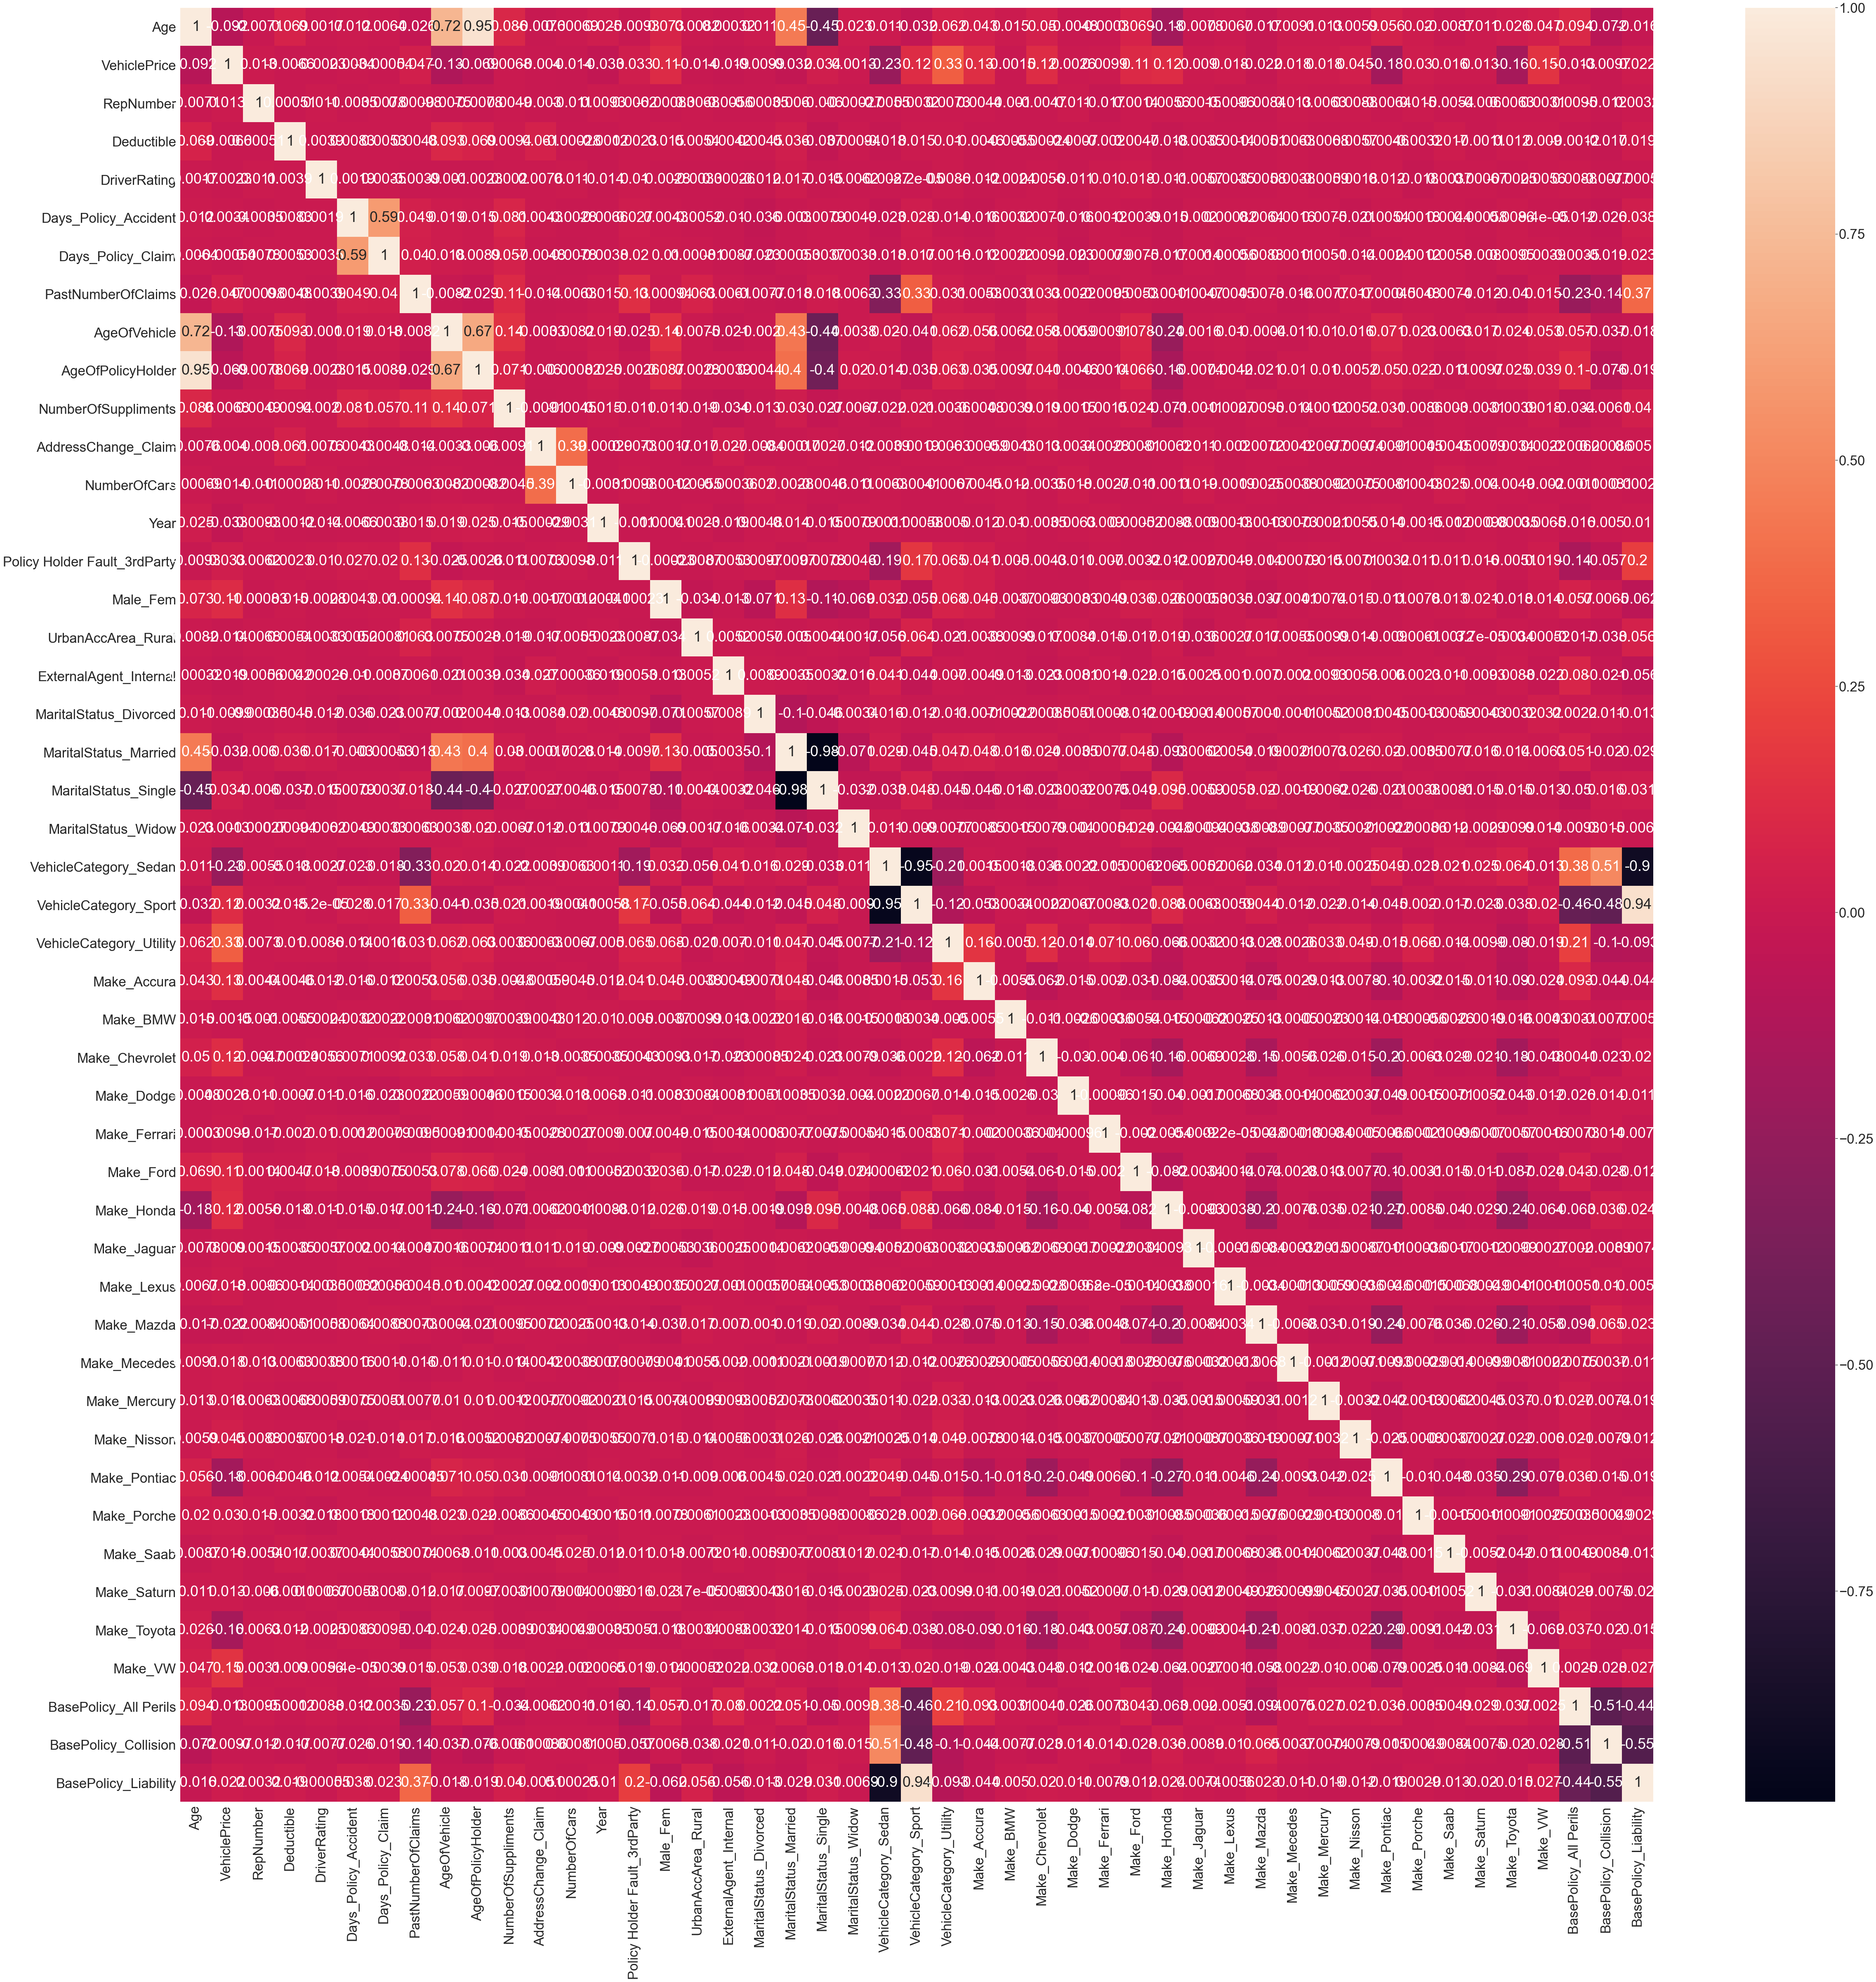

In [72]:
#Plotting heatmap/correlation table


plt.subplots(figsize=(80,80))
corr = X.corr()
sns.heatmap(corr, annot=True,)

In [73]:
cor_matrix =X.corr().abs()
print(cor_matrix)

                                   Age  VehiclePrice  RepNumber  Deductible  \
Age                           1.000000      0.091816   0.007063    0.069420   
VehiclePrice                  0.091816      1.000000   0.013275    0.006614   
RepNumber                     0.007063      0.013275   1.000000    0.000509   
Deductible                    0.069420      0.006614   0.000509    1.000000   
DriverRating                  0.001668      0.002288   0.011031    0.003886   
Days_Policy_Accident          0.012054      0.003446   0.003530    0.008307   
Days_Policy_Claim             0.006360      0.000539   0.007792    0.005309   
PastNumberOfClaims            0.026001      0.047065   0.000976    0.004806   
AgeOfVehicle                  0.722529      0.127029   0.007499    0.092986   
AgeOfPolicyHolder             0.949911      0.069380   0.007753    0.069307   
NumberOfSuppliments           0.086335      0.006830   0.004872    0.009400   
AddressChange_Claim           0.007606      0.003963

In [74]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [75]:
#Looking for highly correlated variables

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(); 
print(to_drop)


['AgeOfVehicle', 'AgeOfPolicyHolder', 'MaritalStatus_Single', 'VehicleCategory_Sport', 'BasePolicy_Liability']


In [76]:
X=X.drop(to_drop,axis=1)

In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           15420 non-null  float64
 1   VehiclePrice                  15420 non-null  float64
 2   RepNumber                     15420 non-null  float64
 3   Deductible                    15420 non-null  float64
 4   DriverRating                  15420 non-null  float64
 5   Days_Policy_Accident          15420 non-null  float64
 6   Days_Policy_Claim             15420 non-null  float64
 7   PastNumberOfClaims            15420 non-null  float64
 8   NumberOfSuppliments           15420 non-null  float64
 9   AddressChange_Claim           15420 non-null  float64
 10  NumberOfCars                  15420 non-null  float64
 11  Year                          15420 non-null  float64
 12  Policy Holder Fault_3rdParty  15420 non-null  float64
 13  M

In [78]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

In [79]:
#col=X.columns
#col=list(col)
#col
#X=scaler.fit_transform(X[col])
#X

In [80]:
#X=(X-X.min())/(X.max()-X.min())

In [81]:
#X

# Train-test split.


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [83]:
#Train set target variable distribution

total_def_loan=sum(y_train)
freq_default=total_def_loan/len(y_train)
freq_non_def=1-freq_default

print("defaults,%    ", freq_default*100)
print("non_defaults,%   ", freq_non_def*100)

defaults,%     5.982490272373541
non_defaults,%    94.01750972762646


In [84]:
#Test set target variable distribution

total_def_loan=sum(y_test)
freq_default=total_def_loan/len(y_test)
freq_non_def=1-freq_default

print("defaults,%    ", freq_default*100)
print("non_defaults,%   ", freq_non_def*100)

defaults,%     5.998702983138781
non_defaults,%    94.00129701686122


In [85]:
#Still some data preprocessing here
years.columns=[ "Y1994","Y1995","Y1996"]
years=(years-years.min())/(years.max()-years.min())
years


Y1994  Y1995  Y1996
0        1.0    0.0    0.0
1        1.0    0.0    0.0
2        1.0    0.0    0.0
3        1.0    0.0    0.0
4        1.0    0.0    0.0
...      ...    ...    ...
15415    0.0    0.0    1.0
15416    0.0    0.0    1.0
15417    0.0    0.0    1.0
15418    0.0    0.0    1.0
15419    0.0    0.0    1.0

[15420 rows x 3 columns]

In [86]:
# I am creating train and test set for Lasso seprately, because i want to include all the variables in the set
X_train_Lasso=pd.concat([X_train,Lasso_months],join = 'inner',axis=1)
X_train_Lasso=pd.concat([X_train_Lasso,years],join = 'inner',axis=1)
X_train_Lasso=X_train_Lasso.drop('Year',axis=1)
X_train_Lasso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12336 entries, 8294 to 14468
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           12336 non-null  float64
 1   VehiclePrice                  12336 non-null  float64
 2   RepNumber                     12336 non-null  float64
 3   Deductible                    12336 non-null  float64
 4   DriverRating                  12336 non-null  float64
 5   Days_Policy_Accident          12336 non-null  float64
 6   Days_Policy_Claim             12336 non-null  float64
 7   PastNumberOfClaims            12336 non-null  float64
 8   NumberOfSuppliments           12336 non-null  float64
 9   AddressChange_Claim           12336 non-null  float64
 10  NumberOfCars                  12336 non-null  float64
 11  Policy Holder Fault_3rdParty  12336 non-null  float64
 12  Male_Fem                      12336 non-null  float64
 13

In [87]:
X_test_Lasso=pd.concat([X_test,Lasso_months],join = 'inner',axis=1)
X_test_Lasso=pd.concat([X_test_Lasso,years],join = 'inner',axis=1)
X_test_Lasso=X_test_Lasso.drop('Year',axis=1)
X_test_Lasso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3084 entries, 8922 to 5260
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           3084 non-null   float64
 1   VehiclePrice                  3084 non-null   float64
 2   RepNumber                     3084 non-null   float64
 3   Deductible                    3084 non-null   float64
 4   DriverRating                  3084 non-null   float64
 5   Days_Policy_Accident          3084 non-null   float64
 6   Days_Policy_Claim             3084 non-null   float64
 7   PastNumberOfClaims            3084 non-null   float64
 8   NumberOfSuppliments           3084 non-null   float64
 9   AddressChange_Claim           3084 non-null   float64
 10  NumberOfCars                  3084 non-null   float64
 11  Policy Holder Fault_3rdParty  3084 non-null   float64
 12  Male_Fem                      3084 non-null   float64
 13  

In [88]:
#X_train=(X_train-X_train.mean())/X_train.std()

In [89]:
#X_test=(X_test-X_test.mean())/X_test.std()

In [90]:
#maybe try min maxscalinf here???

In [91]:
#Logistic Regression

In [92]:
#Fitting the model on the train set

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.189526
         Iterations: 35
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.163      
Dependent Variable:          FraudFound_P            AIC:                     4759.9789  
Date:                        2022-11-14 14:00        BIC:                     5071.6305  
No. Observations:            12336                   Log-Likelihood:          -2338.0    
Df Model:                    41                      LL-Null:                 -2793.9    
Df Residuals:                12294                   LLR p-value:             1.3320e-164
Converged:                   0.0000                  Scale:                   1.0000     
No. Iterations:              35.0000                                                     
-----------------------------------------------------------------------------------------
                              Coef.     Std.Err.     z    P>|z|     [0.0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [93]:
X_train=X_train.drop(['Make_BMW','Make_Ferrari','Make_Jaguar','Make_Lexus','Make_Porche'], axis=1)

In [94]:
X_test=X_test.drop(['Make_BMW','Make_Ferrari','Make_Jaguar','Make_Lexus','Make_Porche'], axis=1)

In [95]:
#Fitting the model on the train set

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.191053
         Iterations: 35
                                     Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.156      
Dependent Variable:         FraudFound_P            AIC:                     4787.6706  
Date:                       2022-11-14 14:00        BIC:                     5062.2209  
No. Observations:           12336                   Log-Likelihood:          -2356.8    
Df Model:                   36                      LL-Null:                 -2793.9    
Df Residuals:               12299                   LLR p-value:             3.3909e-160
Converged:                  0.0000                  Scale:                   1.0000     
No. Iterations:             35.0000                                                     
----------------------------------------------------------------------------------------
                              Coef.    Std.Err.     z    P>|z|     [0.025       0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [96]:
X_train=X_train.drop(['VehiclePrice','RepNumber','Days_Policy_Claim','NumberOfCars'],axis=1)
X_test=X_test.drop(['VehiclePrice','RepNumber','Days_Policy_Claim','NumberOfCars'],axis=1)

In [97]:
X_train=X_train.drop(['Year'], axis=1)
X_test=X_test.drop(['Year'], axis=1)

In [98]:
#Fitting the model on the train set

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.192507
         Iterations: 35
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.150      
Dependent Variable:      FraudFound_P        AIC:                 4813.5248  
Date:                    2022-11-14 14:00    BIC:                 5050.9736  
No. Observations:        12336               Log-Likelihood:      -2374.8    
Df Model:                31                  LL-Null:             -2793.9    
Df Residuals:            12304               LLR p-value:         2.9860e-156
Converged:               0.0000              Scale:               1.0000     
No. Iterations:          35.0000                                             
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------------
Age                          -

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [99]:
X_train=X_train.drop(['DriverRating', 'PastNumberOfClaims','AddressChange_Claim','Male_Fem'], axis=1)

In [100]:
X_test=X_test.drop(['DriverRating', 'PastNumberOfClaims','AddressChange_Claim','Male_Fem'], axis=1)

In [101]:
#Fitting the model on the train set

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.192634
         Iterations: 35
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.149      
Dependent Variable:        FraudFound_P          AIC:                   4808.6628  
Date:                      2022-11-14 14:00      BIC:                   5016.4305  
No. Observations:          12336                 Log-Likelihood:        -2376.3    
Df Model:                  27                    LL-Null:               -2793.9    
Df Residuals:              12308                 LLR p-value:           1.5170e-158
Converged:                 0.0000                Scale:                 1.0000     
No. Iterations:            35.0000                                                 
-----------------------------------------------------------------------------------
                              Coef.    Std.Err.    z    P>|z|    [0.025     0.975] 
---------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [102]:
X_train=X_train.drop(['MaritalStatus_Divorced', 'MaritalStatus_Married'], axis=1)

In [103]:
X_test=X_test.drop(['MaritalStatus_Divorced', 'MaritalStatus_Married'], axis=1)

In [104]:
#X_train=X_train.drop(['AddressChange_Claim', 'Male_Fem'], axis=1)

In [105]:
#Fitting the model on the train set

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.192666
         Iterations: 35
                                    Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.149      
Dependent Variable:         FraudFound_P           AIC:                    4805.4454  
Date:                       2022-11-14 14:00       BIC:                    4998.3726  
No. Observations:           12336                  Log-Likelihood:         -2376.7    
Df Model:                   25                     LL-Null:                -2793.9    
Df Residuals:               12310                  LLR p-value:            6.6276e-160
Converged:                  0.0000                 Scale:                  1.0000     
No. Iterations:             35.0000                                                   
--------------------------------------------------------------------------------------
                              Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [106]:
X_train=X_train.drop(['Make_Mecedes'],axis=1)

In [107]:
X_test=X_test.drop(['Make_Mecedes'],axis=1)

In [108]:
#Fitting the model on the train set

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.192791
         Iterations 9
                               Results: Logit
Model:                  Logit               Pseudo R-squared:    0.149      
Dependent Variable:     FraudFound_P        AIC:                 4806.5499  
Date:                   2022-11-14 14:00    BIC:                 4992.0568  
No. Observations:       12336               Log-Likelihood:      -2378.3    
Df Model:               24                  LL-Null:             -2793.9    
Df Residuals:           12311               LLR p-value:         5.0359e-160
Converged:              1.0000              Scale:               1.0000     
No. Iterations:         9.0000                                              
----------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Age  

In [109]:
X_train=X_train.drop(['MaritalStatus_Widow'],axis=1)

In [110]:
X_test=X_test.drop(['MaritalStatus_Widow'],axis=1)

In [111]:
#Fitting the model on the train set

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.192797
         Iterations 9
                               Results: Logit
Model:                  Logit               Pseudo R-squared:    0.149      
Dependent Variable:     FraudFound_P        AIC:                 4804.6814  
Date:                   2022-11-14 14:01    BIC:                 4982.7680  
No. Observations:       12336               Log-Likelihood:      -2378.3    
Df Model:               23                  LL-Null:             -2793.9    
Df Residuals:           12312               LLR p-value:         8.8235e-161
Converged:              1.0000              Scale:               1.0000     
No. Iterations:         9.0000                                              
----------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Age  

In [112]:
np.corrcoef(y,fraud_data['VehicleCategory_Sport'])

array([[ 1.       , -0.1359026],
       [-0.1359026,  1.       ]])

In [114]:
logit_model.exog_names

['Age',
 'Deductible',
 'Days_Policy_Accident',
 'NumberOfSuppliments',
 'Policy Holder Fault_3rdParty',
 'UrbanAccArea_Rural',
 'ExternalAgent_Internal',
 'VehicleCategory_Sedan',
 'VehicleCategory_Utility',
 'Make_Accura',
 'Make_Chevrolet',
 'Make_Dodge',
 'Make_Ford',
 'Make_Honda',
 'Make_Mazda',
 'Make_Mercury',
 'Make_Nisson',
 'Make_Pontiac',
 'Make_Saab',
 'Make_Saturn',
 'Make_Toyota',
 'Make_VW',
 'BasePolicy_All Perils',
 'BasePolicy_Collision']

In [115]:
log1 = LogisticRegression()
log1.fit(X_train, y_train)
logloss1= log_loss(y_train, log1.predict_proba(X_train))

In [116]:
logloss1

0.19024729357928255

In [117]:
#confusion matrix for train set
confusion_matrix(y_train,log1.predict(X_train))

array([[11598,     0],
       [  738,     0]])

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_train,log1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11598
           1       0.00      0.00      0.00       738

    accuracy                           0.94     12336
   macro avg       0.47      0.50      0.48     12336
weighted avg       0.88      0.94      0.91     12336



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
print(classification_report(y_test,log1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
logloss2= log_loss(y_test, log1.predict_proba(X_test))
logloss2

0.18935852606664186

In [120]:
#logreg train set

THRESHOLD = [.1,0.2, .25,0.3,.4, 0.5,0.7,0.8,0.9]
# Create dataframe to store results
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

# Create threshold row
results['THRESHOLD'] = THRESHOLD                                                                         
             
j = 0                                                                                                      

# Iterate over the 3 thresholds

for i in THRESHOLD:                                                                                       
    
    
    #lgstc_reg.fit(X_train, y_train)                                                                    
    
    
    # If prob for test set > threshold predict 1
    preds = np.where(log1.predict_proba(X_train)[:,1] > i, 1, 0)                                      
    
    
    # create confusion matrix 
    cm = (confusion_matrix(y_train, preds,labels=[1, 0], sample_weight=None) / len(y_train))*100                   # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_train, preds) 
    results.iloc[j,2] = recall_score(y_train, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_train, preds)
    results.iloc[j,6] = f1_score(y_train, preds)
   
   
    j += 1

print('ALL METRICS')
print( results.T)



Confusion matrix for threshold = 0.1
[[ 4.13424125  1.84824903]
 [24.34338521 69.67412451]]
 
Confusion matrix for threshold = 0.2
[[ 0.55933852  5.42315175]
 [ 1.66990921 92.34760052]]
 
Confusion matrix for threshold = 0.25
[[ 0.16212711  5.82036316]
 [ 0.33236057 93.68514916]]
 
Confusion matrix for threshold = 0.3
[[3.24254215e-02 5.95006485e+00]
 [8.91699092e-02 9.39283398e+01]]
 
Confusion matrix for threshold = 0.4
[[ 0.          5.98249027]
 [ 0.         94.01750973]]
 
Confusion matrix for threshold = 0.5
[[ 0.          5.98249027]
 [ 0.         94.01750973]]
 
Confusion matrix for threshold = 0.7
[[ 0.          5.98249027]
 [ 0.         94.01750973]]
 
Confusion matrix for threshold = 0.8
[[ 0.          5.98249027]
 [ 0.         94.01750973]]
 
Confusion matrix for threshold = 0.9
[[ 0.          5.98249027]
 [ 0.         94.01750973]]
 
ALL METRICS
                       0         1         2         3         4         5  \
THRESHOLD            0.1       0.2      0.25       

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision 

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.8002489448933117


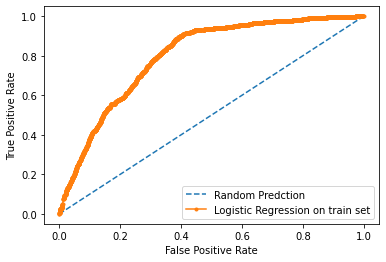

In [350]:
# Calculate the receiver operating curve and the AUC measure for train set

lr_prob=log1.predict_proba(X_train)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_train))]
ns_auc=roc_auc_score(y_train, ns_prob)
lr_auc=roc_auc_score(y_train,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_train,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_train,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression on train set')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [128]:
#So as a small conclusion here... I keep deleting variables to be left
# with only significant ones. All the variables are significant at 1% percent level
# Except Deductable and NumberOfSupplements (significant at 10% level)

# As a result i get quite good AUC for train set 0.8



In [122]:
#confusion matrix for test set
confusion_matrix(y_test,log1.predict(X_test))

array([[2899,    0],
       [ 185,    0]])

In [121]:
#logreg test set

THRESHOLD = [.1,0.2, .25,0.3,.4, 0.5,0.7,0.8,0.9]
# Create dataframe to store results
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

# Create threshold row
results['THRESHOLD'] = THRESHOLD                                                                         
             
j = 0                                                                                                      

# Iterate over the 3 thresholds

for i in THRESHOLD:                                                                                       
    
    
    #lgstc_reg.fit(X_train, y_train)                                                                    
    
    
    # If prob for test set > threshold predict 1
    preds = np.where(log1.predict_proba(X_test)[:,1] > i, 1, 0)                                      
    
    
    # create confusion matrix 
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100                   # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
   
   
    j += 1

print('ALL METRICS')
print( results.T)



Confusion matrix for threshold = 0.1
[[ 4.40985733  1.58884565]
 [25.12970169 68.87159533]]
 
Confusion matrix for threshold = 0.2
[[ 0.38910506  5.60959792]
 [ 2.1076524  91.89364462]]
 
Confusion matrix for threshold = 0.25
[[3.24254215e-02 5.96627756e+00]
 [4.21530480e-01 9.35797665e+01]]
 
Confusion matrix for threshold = 0.3
[[ 0.          5.99870298]
 [ 0.09727626 93.90402075]]
 
Confusion matrix for threshold = 0.4
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
Confusion matrix for threshold = 0.5
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
Confusion matrix for threshold = 0.7
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
Confusion matrix for threshold = 0.8
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
Confusion matrix for threshold = 0.9
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
ALL METRICS
                       0         1         2         3         4         5  \
THRESHOLD            0.1       0.2      0.25       

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision 

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.8023512301539207


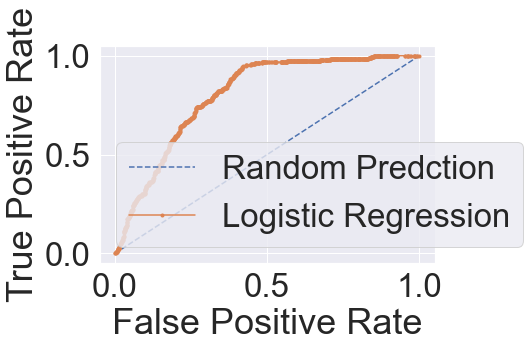

In [131]:
# Calculate the receiver operating curve and the AUC measure

#Test set

lr_prob=log1.predict_proba(X_test)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
lr_auc=roc_auc_score(y_test,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [356]:
#Lasso LR

In [132]:
#Lasso_months=months.drop(['y'],axis=1)
#Lasso_X=pd.concat([X,Lasso_months],axis=1)


In [133]:
#X_train, X_test, y_train, y_test = train_test_split(Lasso_X, y, test_size=0.2, random_state=42)

In [134]:
#here i need to go back anf to rerun train test split

# LASSO Logistic Regression

In [260]:
#Lasso LR

from sklearn.linear_model import LogisticRegression


LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [372]:
# best C(lambda) parameter for lasso (that gives smallest logloss)
List=[]
for i in [0.0001,0.001,0.01,0.05,0.1,0.5,0.25,0.75,0.9,1,2,4,5,7,10,100,200,300,400,500,600,700,800,900,1000,2000,10000,100000]:
    log_Lasso= LogisticRegression(penalty='l1',C=i,solver='liblinear')
    log_Lasso.fit(X_train_Lasso, y_train)
    logloss2= log_loss(y_train, log_Lasso.predict_proba(X_train_Lasso))
    Element=[i,logloss2]
    List.append(Element)

In [373]:
List

[[0.0001, 0.6931471805599452],
 [0.001, 0.2600163342224962],
 [0.01, 0.22511846351220416],
 [0.05, 0.19588917611954218],
 [0.1, 0.19193436010261844],
 [0.5, 0.1883167119636292],
 [0.25, 0.18938143903520513],
 [0.75, 0.18793964097162152],
 [0.9, 0.18782701311577957],
 [1, 0.1877759277992579],
 [2, 0.18756807565707848],
 [4, 0.18747418805359992],
 [5, 0.18745547884261732],
 [7, 0.18742304873339716],
 [10, 0.18739870563932282],
 [100, 0.18734634296715347],
 [200, 0.18734377135792302],
 [300, 0.18734310242248345],
 [400, 0.18734279599226536],
 [500, 0.18734236296733567],
 [600, 0.1873424636668254],
 [700, 0.18734231953235136],
 [800, 0.1873420797371913],
 [900, 0.1873420337508855],
 [1000, 0.18734196537903416],
 [2000, 0.18734166459061546],
 [10000, 0.18734167973657906],
 [100000, 0.18734156177763955]]

In [286]:
#optimal lambda and its logloss
print(min(List, key=lambda x: x[1]))

[100000, 0.187341428066798]


In [287]:
#training model with optimal parameter
log_Lasso= LogisticRegression(penalty='l1',C=1000,solver='liblinear')
log_Lasso.fit(X_train_Lasso, y_train)

LogisticRegression(C=1000, penalty='l1', solver='liblinear')

In [288]:
logloss2= log_loss(y_train, log_Lasso.predict_proba(X_train_Lasso))

In [289]:
#Lasso cost function (logloss) on a train set
logloss2

0.18734196187344182

In [290]:
log_Lasso.feature_names_in_

array(['Age', 'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'Policy Holder Fault_3rdParty', 'Male_Fem', 'UrbanAccArea_Rural',
       'ExternalAgent_Internal', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Widow',
       'VehicleCategory_Sedan', 'VehicleCategory_Utility', 'Make_Accura',
       'Make_BMW', 'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari',
       'Make_Ford', 'Make_Honda', 'Make_Jaguar', 'Make_Lexus',
       'Make_Mazda', 'Make_Mecedes', 'Make_Mercury', 'Make_Nisson',
       'Make_Pontiac', 'Make_Porche', 'Make_Saab', 'Make_Saturn',
       'Make_Toyota', 'Make_VW', 'BasePolicy_All Perils',
       'BasePolicy_Collision', 'WeekOfMonth', 'WeekOfMonthClaimed',
       'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan',
       'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'M

In [295]:
log_Lasso.coef_

array([[-0.81989917,  0.16991121, -0.17950195,  0.85547333, -0.06861424,
        -0.77543955, -0.58994764,  0.03268287, -0.25072637,  0.15196987,
         0.05499611,  2.56030188,  0.19397499, -0.14744055,  1.14469465,
        -0.33745425,  0.04459341,  0.35845455, -0.77594314, -1.02830097,
        -0.35269043, -0.10220414, -0.80121373, -2.05114311, -6.16135292,
        -0.55501186, -0.86084196, -6.26479637, -5.63745529, -0.81959195,
        -5.68779267, -0.76688471, -1.49720472, -0.83164114, -6.39365514,
        -0.25372753, -0.47029889, -0.77068416, -2.08081358,  3.75568871,
         3.2346742 , -0.11557752,  0.04589156, -0.95870956, -1.4272321 ,
        -1.28273667, -0.73925097, -0.92246189, -1.71197342, -1.16639755,
        -0.68260158, -1.03474289, -1.33000035, -1.05706938, -1.41352813,
        -1.08184537, -1.00924818, -1.08591388, -0.97679226, -1.11035217,
        -1.22220126, -1.21704195, -1.83676469, -1.45721654, -1.59577936,
        -1.10135455, -1.2249273 , -1.58488828, -1.5

In [296]:

#
df = pd.DataFrame({'variable':log_Lasso.feature_names_in_, 'lasso_LR_coefficients':log_Lasso.coef_[0]})
coefs=df.loc[df['lasso_LR_coefficients'] != 0]

In [297]:
coefs_0=df.loc[df['lasso_LR_coefficients'] == 0]
coefs_0

Empty DataFrame
Columns: [variable, lasso_LR_coefficients]
Index: []

In [298]:
coefs_0.count()

variable                 0
lasso_LR_coefficients    0
dtype: int64

In [299]:
coefs.describe()

lasso_LR_coefficients
count              86.000000
mean               -1.038871
std                 1.697445
min                -6.653185
25%                -1.309854
50%                -0.921245
75%                -0.377812
max                 3.755689

In [300]:
coefs

variable  lasso_LR_coefficients
0                Age              -0.819899
1       VehiclePrice               0.169911
2          RepNumber              -0.179502
3         Deductible               0.855473
4       DriverRating              -0.068614
..               ...                    ...
81  MonthClaimed_Oct              -1.031232
82  MonthClaimed_Sep              -0.749176
83             Y1994              -0.492782
84             Y1995              -0.544189
85             Y1996              -0.658516

[86 rows x 2 columns]

In [301]:
coefs.to_excel("Lasso_output.xlsx", sheet_name='Sheet_name_1')

In [302]:
#confusion matrix for train set
confusion_matrix(y_train,log_Lasso.predict(X_train_Lasso))

array([[11597,     1],
       [  738,     0]])

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.812936044949344


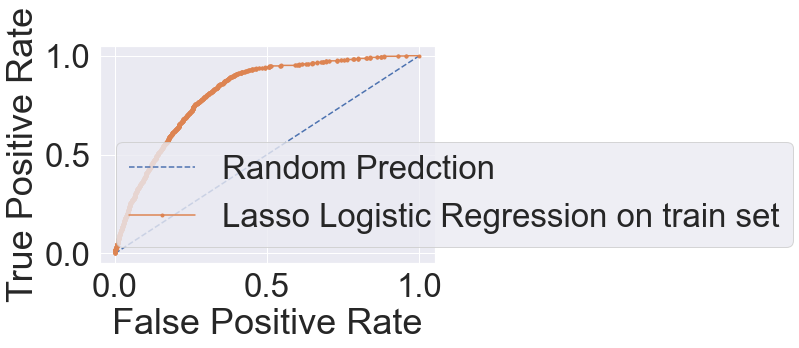

In [303]:
# Calculate the receiver operating curve and the AUC measure for train set

#LASSO TRAIN

lr_prob=log_Lasso.predict_proba(X_train_Lasso)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_train))]
ns_auc=roc_auc_score(y_train, ns_prob)
lr_auc=roc_auc_score(y_train,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_train,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_train,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Lasso Logistic Regression on train set')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [305]:
#TRAIN SET LASSO

THRESHOLD = [.1, .25,0.3,0.35, .4, 0.5,0.7,0.8,0.9]
# Create dataframe to store results
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

# Create threshold row
results['THRESHOLD'] = THRESHOLD                                                                         
             
j = 0                                                                                                      

# Iterate over the 3 thresholds

for i in THRESHOLD:                                                                                       
    
    
    #lgstc_reg.fit(X_train, y_train)                                                                    
    
    
    # If prob for test set > threshold predict 1
    preds = np.where(log_Lasso.predict_proba(X_train_Lasso)[:,1] > i, 1, 0)                                      
    
    
    # create confusion matrix 
    cm = (confusion_matrix(y_train, preds,labels=[1, 0], sample_weight=None) / len(y_train))*100                   # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_train, preds) 
    results.iloc[j,2] = recall_score(y_train, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_train, preds)
    results.iloc[j,6] = f1_score(y_train, preds)
   
   
    j += 1

print('ALL METRICS')
print( results.T)

Confusion matrix for threshold = 0.1
[[ 4.20719844  1.77529183]
 [22.72211414 71.29539559]]
 
Confusion matrix for threshold = 0.25
[[ 0.43774319  5.54474708]
 [ 1.10246433 92.9150454 ]]
 
Confusion matrix for threshold = 0.3
[[ 0.15402075  5.82846952]
 [ 0.37289235 93.64461738]]
 
Confusion matrix for threshold = 0.35
[[9.72762646e-02 5.88521401e+00]
 [8.10635538e-02 9.39364462e+01]]
 
Confusion matrix for threshold = 0.4
[[4.86381323e-02 5.93385214e+00]
 [2.43190661e-02 9.39931907e+01]]
 
Confusion matrix for threshold = 0.5
[[0.00000000e+00 5.98249027e+00]
 [8.10635538e-03 9.40094034e+01]]
 
Confusion matrix for threshold = 0.7
[[ 0.          5.98249027]
 [ 0.         94.01750973]]
 
Confusion matrix for threshold = 0.8
[[ 0.          5.98249027]
 [ 0.         94.01750973]]
 
Confusion matrix for threshold = 0.9
[[ 0.          5.98249027]
 [ 0.         94.01750973]]
 
ALL METRICS
                       0         1         2         3         4         5  \
THRESHOLD            0.1  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [306]:
THRESHOLD = [.1, .25, 0.3,0.35,0.4, 0.5,0.7,0.8,0.9]
# Create dataframe to store results
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

# Create threshold row
results['THRESHOLD'] = THRESHOLD                                                                         
             
j = 0                                                                                                      

# Iterate over the 3 thresholds

for i in THRESHOLD:                                                                                       
    
    
    #lgstc_reg.fit(X_train, y_train)                                                                    
    
    
    # If prob for test set > threshold predict 1
    preds = np.where(log_Lasso.predict_proba(X_test_Lasso)[:,1] > i, 1, 0)                                      
    
    
    # create confusion matrix 
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100                   # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
   
   
    j += 1

print('ALL METRICS')
print( results.T)

Confusion matrix for threshold = 0.1
[[ 3.85862516  2.14007782]
 [23.73540856 70.26588846]]
 
Confusion matrix for threshold = 0.25
[[ 0.51880674  5.47989624]
 [ 1.3618677  92.63942931]]
 
Confusion matrix for threshold = 0.3
[[ 0.25940337  5.73929961]
 [ 0.48638132 93.51491569]]
 
Confusion matrix for threshold = 0.35
[[3.24254215e-02 5.96627756e+00]
 [2.59403372e-01 9.37418936e+01]]
 
Confusion matrix for threshold = 0.4
[[0.00000000e+00 5.99870298e+00]
 [6.48508431e-02 9.39364462e+01]]
 
Confusion matrix for threshold = 0.5
[[0.00000000e+00 5.99870298e+00]
 [3.24254215e-02 9.39688716e+01]]
 
Confusion matrix for threshold = 0.7
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
Confusion matrix for threshold = 0.8
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
Confusion matrix for threshold = 0.9
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
ALL METRICS
                       0         1         2         3         4         5  \
THRESHOLD            0.1  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [307]:
logloss3= log_loss(y_test, log_Lasso.predict_proba(X_test_Lasso))

In [308]:
logloss3

0.19071031556247298

In [309]:
logloss2

0.18734196187344182

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.799463002153585


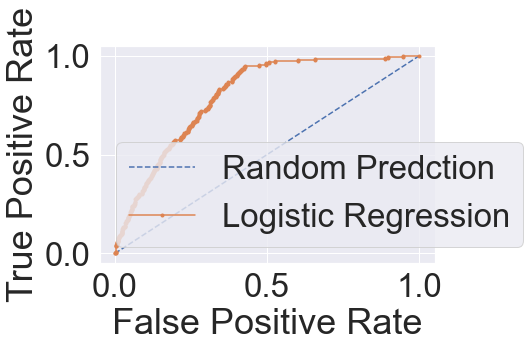

In [310]:
# Calculate the receiver operating curve and the AUC measure 

#LASSO TEST SET

lr_prob=log_Lasso.predict_proba(X_test_Lasso)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
lr_auc=roc_auc_score(y_test,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [312]:
#confusion matrix for test set
confusion_matrix(y_test,log_Lasso.predict(X_test_Lasso))

array([[2898,    1],
       [ 185,    0]])

# Lasso with different lambda

In [127]:
# Optimal C=10000 did not shrik any coefficients
# lets try C=0.75 it gives similiar small logloss=0.1879, 
# but should shrink some coefficients to 0.
Lasso_075=LogisticRegression(penalty='l1',C=0.75,solver='liblinear')
Lasso_075.fit(X_train_Lasso, y_train)
logloss_075= log_loss(y_train, Lasso_075.predict_proba(X_train_Lasso))
logloss_075

0.18794133278025255

In [129]:
logloss_075_T= log_loss(y_test, Lasso_075.predict_proba(X_test_Lasso))
logloss_075_T

0.1883451839805895

In [386]:
Lasso_075.feature_names_in_

array(['Age', 'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'Policy Holder Fault_3rdParty', 'Male_Fem', 'UrbanAccArea_Rural',
       'ExternalAgent_Internal', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Widow',
       'VehicleCategory_Sedan', 'VehicleCategory_Utility', 'Make_Accura',
       'Make_BMW', 'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari',
       'Make_Ford', 'Make_Honda', 'Make_Jaguar', 'Make_Lexus',
       'Make_Mazda', 'Make_Mecedes', 'Make_Mercury', 'Make_Nisson',
       'Make_Pontiac', 'Make_Porche', 'Make_Saab', 'Make_Saturn',
       'Make_Toyota', 'Make_VW', 'BasePolicy_All Perils',
       'BasePolicy_Collision', 'WeekOfMonth', 'WeekOfMonthClaimed',
       'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan',
       'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'M

In [387]:
Lasso_075.coef_

array([[-7.15380052e-01,  1.63105846e-01, -1.70784287e-01,
         7.03376622e-01, -5.49286454e-02, -7.99932755e-01,
        -4.00791915e-01,  0.00000000e+00, -2.46397083e-01,
         1.24958795e-01,  0.00000000e+00,  2.45650500e+00,
         1.62112173e-01, -1.42445236e-01,  3.33624476e-01,
         0.00000000e+00,  1.73748403e-02,  0.00000000e+00,
        -5.13796079e-01, -7.02213516e-01,  4.04607040e-01,
         0.00000000e+00,  0.00000000e+00, -3.78336632e-01,
         0.00000000e+00,  1.80220903e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.11218295e-02,  0.00000000e+00,  4.06056136e-01,
         2.80827683e-02,  1.75540765e-02, -9.88512226e-01,
         3.36274161e+00,  2.84775959e+00, -8.15798889e-02,
         0.00000000e+00,  1.58501530e-02, -6.80781351e-02,
        -3.03200891e-01,  7.95576668e-02,  0.00000000e+00,
        -4.20358324e-01,  0.00000000e+00,  1.89269387e-0

In [379]:
df2 = pd.DataFrame({'variable':Lasso_075.feature_names_in_, 'lasso_075_coefficients':Lasso_075.coef_[0]})
coefs2=df2.loc[df2['lasso_075_coefficients'] != 0]

In [389]:
coefs2

variable  lasso_075_coefficients
0                            Age               -0.715201
1                   VehiclePrice                0.163099
2                      RepNumber               -0.170698
3                     Deductible                0.703519
4                   DriverRating               -0.054963
5           Days_Policy_Accident               -0.800750
6              Days_Policy_Claim               -0.394827
8            NumberOfSuppliments               -0.246405
9            AddressChange_Claim                0.124915
11  Policy Holder Fault_3rdParty                2.456463
12                      Male_Fem                0.162183
13            UrbanAccArea_Rural               -0.142366
14        ExternalAgent_Internal                0.333899
16         MaritalStatus_Married                0.017335
18         VehicleCategory_Sedan               -0.513905
19       VehicleCategory_Utility               -0.702351
20                   Make_Accura                0.404701
23                    Make_Dodge               -0.378033
25                     Make_Ford                0.180268
33                  Make_Pontiac               -0.021050
35                     Make_Saab                0.405980
36                   Make_Saturn                0.028102
37                   Make_Toyota                0.017618
38                       Make_VW               -0.988477
39         BasePolicy_All Perils                3.362998
40          BasePolicy_Collision                2.848049
41                   WeekOfMonth               -0.081320
43                     Month_Apr                0.015880
44                     Month_Aug               -0.068113
45                     Month_Dec               -0.303240
46                     Month_Feb                0.079416
48                     Month_Jul               -0.420267
50                     Month_Mar                0.189287
51                     Month_May                0.024973
52                     Month_Nov               -0.274216
54                     Month_Sep               -0.134195
56              DayOfWeek_Monday                0.045301
58              DayOfWeek_Sunday                0.085723
59            DayOfWeek_Thursday               -0.001837
60             DayOfWeek_Tuesday               -0.131175
61           DayOfWeek_Wednesday               -0.120327
64       DayOfWeekClaimed_Monday               -0.121249
65     DayOfWeekClaimed_Saturday                0.137827
67     DayOfWeekClaimed_Thursday               -0.115515
68      DayOfWeekClaimed_Tuesday               -0.073102
72              MonthClaimed_Aug                0.318621
73              MonthClaimed_Dec               -0.115897
74              MonthClaimed_Feb               -0.063238
75              MonthClaimed_Jan               -0.025789
78              MonthClaimed_Mar               -0.037030
79              MonthClaimed_May                0.151153
80              MonthClaimed_Nov               -0.409773
82              MonthClaimed_Sep                0.069234
84                         Y1995               -0.040460
85                         Y1996               -0.156415

In [390]:
coefs2.count()

variable                  55
lasso_075_coefficients    55
dtype: int64

In [391]:
coefs2_0=df2.loc[df2['lasso_075_coefficients'] == 0]
coefs2_0

variable  lasso_075_coefficients
7           PastNumberOfClaims                     0.0
10                NumberOfCars                     0.0
15      MaritalStatus_Divorced                     0.0
17         MaritalStatus_Widow                     0.0
21                    Make_BMW                     0.0
22              Make_Chevrolet                     0.0
24                Make_Ferrari                     0.0
26                  Make_Honda                     0.0
27                 Make_Jaguar                     0.0
28                  Make_Lexus                     0.0
29                  Make_Mazda                     0.0
30                Make_Mecedes                     0.0
31                Make_Mercury                     0.0
32                 Make_Nisson                     0.0
34                 Make_Porche                     0.0
42          WeekOfMonthClaimed                     0.0
47                   Month_Jan                     0.0
49                   Month_Jun                     0.0
53                   Month_Oct                     0.0
55            DayOfWeek_Friday                     0.0
57          DayOfWeek_Saturday                     0.0
62          DayOfWeekClaimed_0                     0.0
63     DayOfWeekClaimed_Friday                     0.0
66     DayOfWeekClaimed_Sunday                     0.0
69  DayOfWeekClaimed_Wednesday                     0.0
70              MonthClaimed_0                     0.0
71            MonthClaimed_Apr                     0.0
76            MonthClaimed_Jul                     0.0
77            MonthClaimed_Jun                     0.0
81            MonthClaimed_Oct                     0.0
83                       Y1994                     0.0

In [392]:
coefs2_0.count()

variable                  31
lasso_075_coefficients    31
dtype: int64

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.8103180811942625


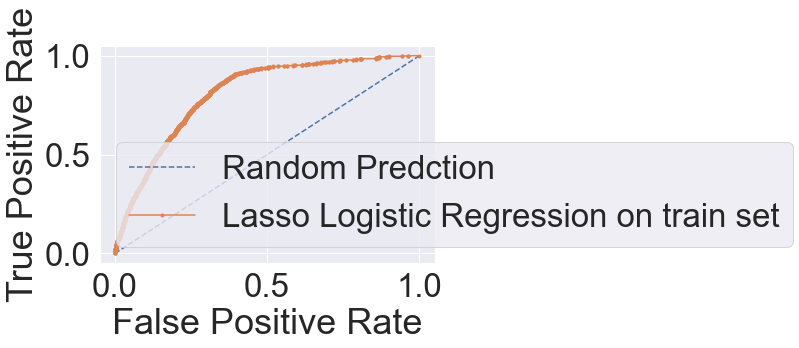

In [393]:
# Calculate the receiver operating curve and the AUC measure for train set

#LASSO_075 TRAIN

lr_prob=Lasso_075.predict_proba(X_train_Lasso)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_train))]
ns_auc=roc_auc_score(y_train, ns_prob)
lr_auc=roc_auc_score(y_train,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_train,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_train,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Lasso Logistic Regression on train set')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [397]:
#TRAIN SET LASSO_075

THRESHOLD = [.1, .25,0.3,0.35, .4, 0.5,0.7,0.8,0.9]
# Create dataframe to store results
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

# Create threshold row
results['THRESHOLD'] = THRESHOLD                                                                         
             
j = 0                                                                                                      

# Iterate over the 3 thresholds

for i in THRESHOLD:                                                                                       
    
    
    #lgstc_reg.fit(X_train, y_train)                                                                    
    
    
    # If prob for test set > threshold predict 1
    preds = np.where(Lasso_075.predict_proba(X_train_Lasso)[:,1] > i, 1, 0)                                      
    
    
    # create confusion matrix 
    cm = (confusion_matrix(y_train, preds,labels=[1, 0], sample_weight=None) / len(y_train))*100                   # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_train, preds) 
    results.iloc[j,2] = recall_score(y_train, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_train, preds)
    results.iloc[j,6] = f1_score(y_train, preds)
   
   
    j += 1

print('ALL METRICS')
print( results.T)

Confusion matrix for threshold = 0.1
[[ 4.29636835  1.68612192]
 [23.42736706 70.59014267]]
 
Confusion matrix for threshold = 0.25
[[ 0.34046693  5.64202335]
 [ 0.65661479 93.36089494]]
 
Confusion matrix for threshold = 0.3
[[ 0.12159533  5.86089494]
 [ 0.12970169 93.88780804]]
 
Confusion matrix for threshold = 0.35
[[6.48508431e-02 5.91763943e+00]
 [2.43190661e-02 9.39931907e+01]]
 
Confusion matrix for threshold = 0.4
[[8.10635538e-03 5.97438392e+00]
 [1.62127108e-02 9.40012970e+01]]
 
Confusion matrix for threshold = 0.5
[[ 0.          5.98249027]
 [ 0.         94.01750973]]
 
Confusion matrix for threshold = 0.7
[[ 0.          5.98249027]
 [ 0.         94.01750973]]
 
Confusion matrix for threshold = 0.8
[[ 0.          5.98249027]
 [ 0.         94.01750973]]
 
Confusion matrix for threshold = 0.9
[[ 0.          5.98249027]
 [ 0.         94.01750973]]
 
ALL METRICS
                       0         1         2         3         4         5  \
THRESHOLD            0.1      0.25    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision 

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.8058622264900293


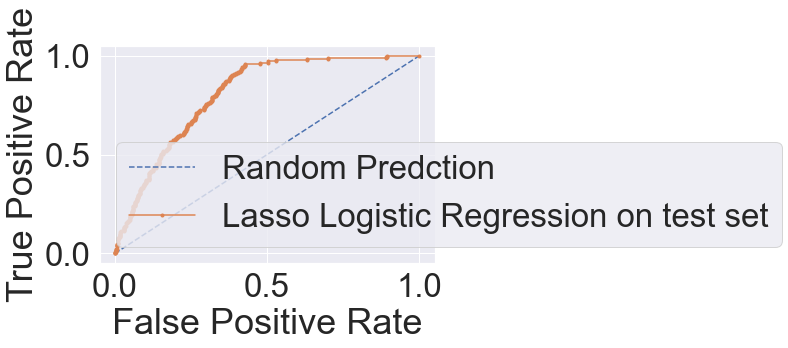

In [396]:
# Calculate the receiver operating curve and the AUC measure for train set

#LASSO_075 TEST

lr_prob=Lasso_075.predict_proba(X_test_Lasso)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
lr_auc=roc_auc_score(y_test,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Lasso Logistic Regression on test set')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [398]:
#TEST SET LASSO_075

THRESHOLD = [.1, .25,0.3,0.35, .4, 0.5,0.7,0.8,0.9]
# Create dataframe to store results
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

# Create threshold row
results['THRESHOLD'] = THRESHOLD                                                                         
             
j = 0                                                                                                      

# Iterate over the 3 thresholds

for i in THRESHOLD:                                                                                       
    
    
    #lgstc_reg.fit(X_train, y_train)                                                                    
    
    
    # If prob for test set > threshold predict 1
    preds = np.where(Lasso_075.predict_proba(X_test_Lasso)[:,1] > i, 1, 0)                                      
    
    
    # create confusion matrix 
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100                   # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
   
   
    j += 1

print('ALL METRICS')
print( results.T)

Confusion matrix for threshold = 0.1
[[ 4.02075227  1.97795071]
 [24.12451362 69.8767834 ]]
 
Confusion matrix for threshold = 0.25
[[ 0.4539559   5.54474708]
 [ 0.87548638 93.12581064]]
 
Confusion matrix for threshold = 0.3
[[3.24254215e-02 5.96627756e+00]
 [2.59403372e-01 9.37418936e+01]]
 
Confusion matrix for threshold = 0.35
[[0.00000000e+00 5.99870298e+00]
 [3.24254215e-02 9.39688716e+01]]
 
Confusion matrix for threshold = 0.4
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
Confusion matrix for threshold = 0.5
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
Confusion matrix for threshold = 0.7
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
Confusion matrix for threshold = 0.8
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
Confusion matrix for threshold = 0.9
[[ 0.          5.99870298]
 [ 0.         94.00129702]]
 
ALL METRICS
                       0         1         2         3         4         5  \
THRESHOLD            0.1      0.25    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision 

In [400]:
#So Lasso with C=0.75 gives similiar classification performance (AUC score almost the same)
#But uses less varaiables (31 features were elimimated)

# I guess we can try smaller values of parameter C. We should obtain lower accuracy
#but we will use lighter model (less variables). 

#But still we should be able to find a balance between the value of C 
#(which influence the amount of coefficients shriked to 0)
#and the performance or classification power of the model
#depending on our assignmemt


# Random forest+decison tree

In [134]:
model_RFC = RandomForestClassifier()

In [135]:
model_RFC.fit(X_train_Lasso,y_train)

RandomForestClassifier()

In [316]:
roc_auc_score(y_train,model_RFC.predict(X_train_Lasso))

0.9993224932249323

In [317]:
print(classification_report(y_train, model_RFC.predict(X_train_Lasso)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11598
           1       1.00      1.00      1.00       738

    accuracy                           1.00     12336
   macro avg       1.00      1.00      1.00     12336
weighted avg       1.00      1.00      1.00     12336



In [318]:
model_RFC.predict(X_test_Lasso)

array([0, 0, 0, ..., 0, 0, 0])

In [319]:
print(classification_report(y_test, model_RFC.predict(X_test_Lasso)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.01      0.01       185

    accuracy                           0.94      3084
   macro avg       0.97      0.50      0.49      3084
weighted avg       0.94      0.94      0.91      3084



In [412]:
roc_auc_score(y_test,model_RFC.predict(X_test_Lasso))

0.5027027027027027

In [320]:
#Random forest surprisingly overfits

In [351]:
model_RFC_2 = RandomForestClassifier(max_depth=20)

In [352]:
model_RFC_2.fit(X_train_Lasso,y_train)

RandomForestClassifier(max_depth=20)

In [353]:
roc_auc_score(y_train,model_RFC_2.predict(X_train_Lasso))

0.8678861788617886

In [354]:
print(classification_report(y_test, model_RFC_2.predict(X_test_Lasso)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.01      0.01       185

    accuracy                           0.94      3084
   macro avg       0.97      0.50      0.49      3084
weighted avg       0.94      0.94      0.91      3084



In [355]:
roc_auc_score(y_test,model_RFC_2.predict(X_test_Lasso))

0.5027027027027027

In [459]:
# Decision tree

In [356]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image

In [365]:
pred = DecisionTreeClassifier()
pred = pred.fit(X_train_Lasso,y_train)
#fig, ax = plt.subplots(figsize=(40, 30))
#plot_tree(pred, filled=True, feature_names=X_train_Lasso.columns, proportion=False)
#plt.show()

In [366]:
roc_auc_score(y_train,pred.predict(X_train_Lasso))

1.0

In [367]:
print(classification_report(y_train, pred.predict(X_train_Lasso)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11598
           1       1.00      1.00      1.00       738

    accuracy                           1.00     12336
   macro avg       1.00      1.00      1.00     12336
weighted avg       1.00      1.00      1.00     12336



In [368]:
roc_auc_score(y_test,pred.predict(X_test_Lasso))

0.5757400035426942

In [469]:
print(classification_report(y_test, pred.predict(X_test_Lasso)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2899
           1       0.17      0.19      0.18       185

    accuracy                           0.90      3084
   macro avg       0.56      0.57      0.56      3084
weighted avg       0.90      0.90      0.90      3084



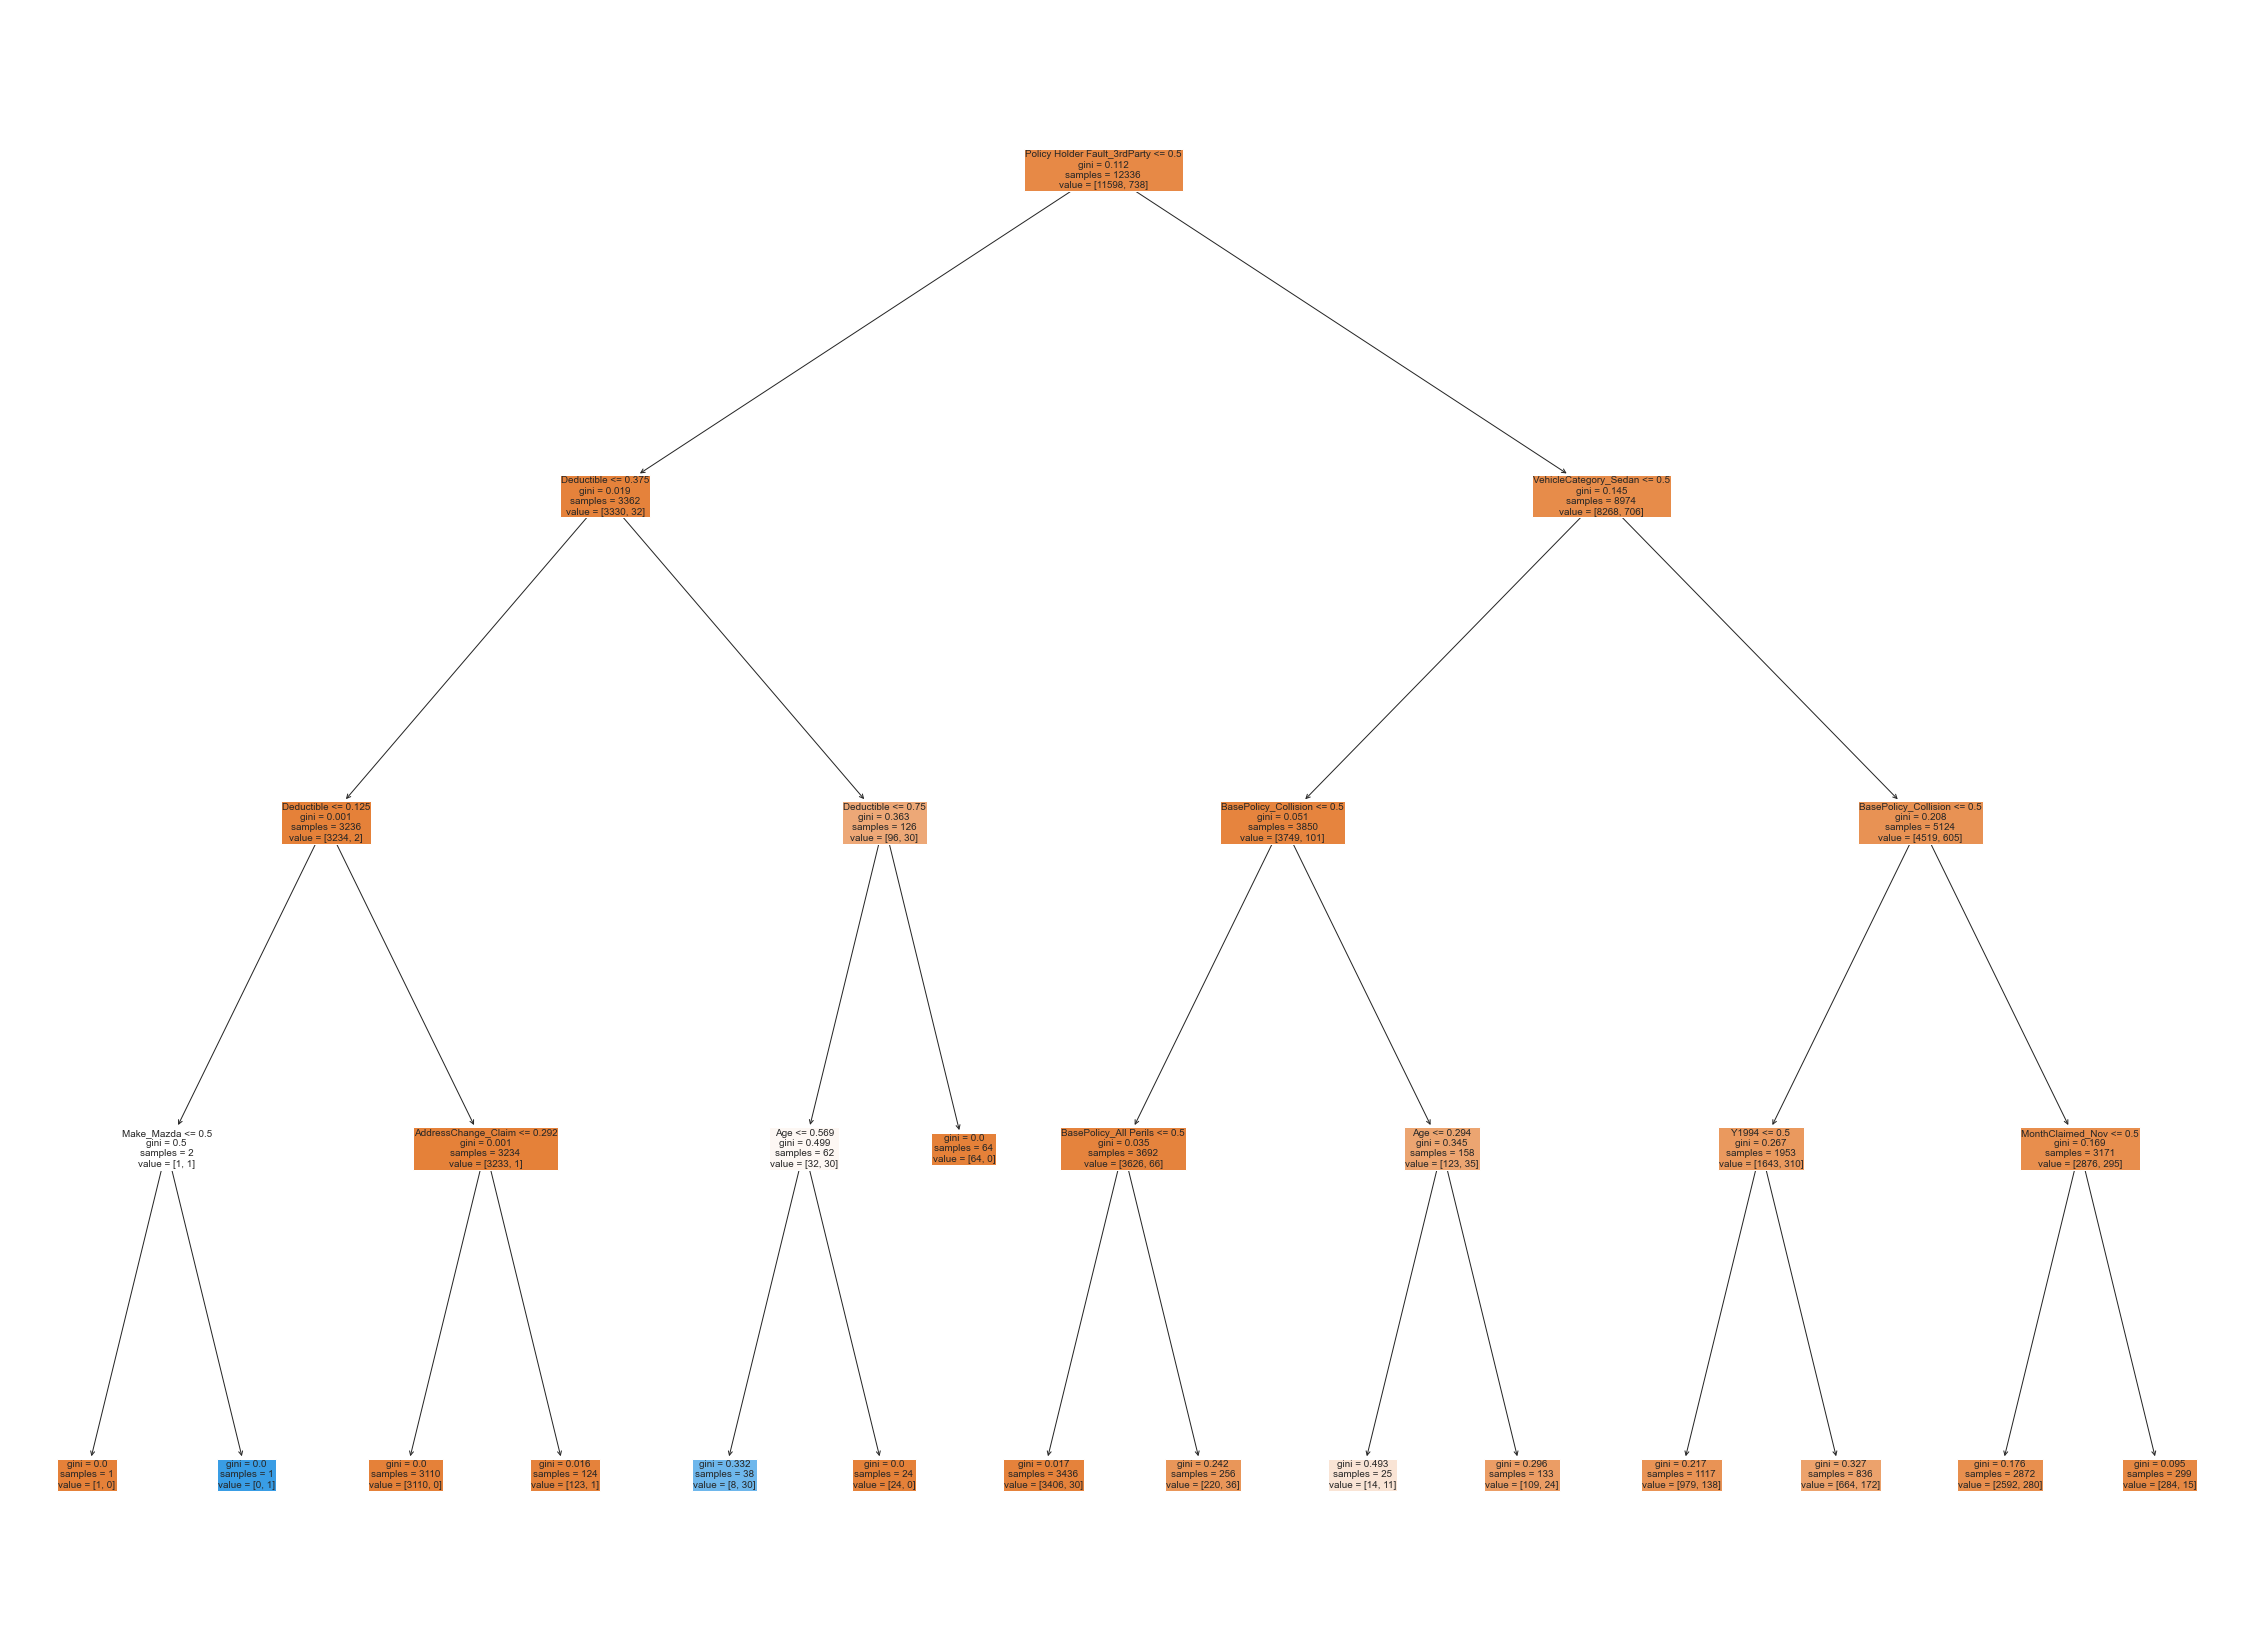

In [360]:
pred_2 = DecisionTreeClassifier(max_depth=4)
pred_2 = pred_2.fit(X_train_Lasso,y_train)
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(pred_2, filled=True, feature_names=X_train_Lasso.columns, proportion=False)
plt.show()

In [362]:
roc_auc_score(y_train,pred_2.predict(X_train_Lasso))

0.520657822977609

In [364]:
roc_auc_score(y_test,pred_2.predict(X_test_Lasso))

0.5104658642775235

In [369]:
#So surprisingly for me Both Random forest and Decision tree did pretty bad 